# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon import Lexicon_FR_updated as lexicon_fr
from utils.io import boreholes_from_files, striplog_from_text,gdf_viewer,\
df_from_sources, striplog_from_df
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 

import matplotlib.pyplot as plt
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
df = pd.read_csv('test_data_boreholes.csv', sep=',')

## Data Checking

In [3]:
df.drop('Z', axis='columns', inplace=True)
df.rename({'new_Z':'Z'}, axis='columns', inplace=True)

In [4]:
df.loc[df.query('Colour=="tan"').index, 'Colour'] = 'green' # use simple colour

In [5]:
df[:10]

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho
0,BH001,152600.0,121039.0,101.0,0.43,39,sand,gainsboro,4,0,4
1,BH001,152600.0,121039.0,97.0,0.43,39,clay,green,4,4,8
2,BH001,152600.0,121039.0,93.0,0.43,39,sandstone,forestgreen,12,8,20
3,BH001,152600.0,121039.0,81.0,0.43,39,coal,antiquewhite,8,20,28
4,BH001,152600.0,121039.0,73.0,0.43,39,limestone,darkslategrey,11,28,39
5,BH002,152819.0,121586.0,103.0,0.60,37,sand,gainsboro,5,0,5
6,BH002,152819.0,121586.0,98.0,0.60,37,clay,green,3,5,8
7,BH002,152819.0,121586.0,95.0,0.60,37,sandstone,forestgreen,6,8,14
8,BH002,152819.0,121586.0,89.0,0.60,37,coal,antiquewhite,1,14,15
9,BH002,152819.0,121586.0,88.0,0.60,37,limestone,darkslategrey,22,15,37


In [6]:
df.query('X==152013.0 and Y==121905.0')

,ID,X,Y,Z,Diameter,Length,Lithology,Colour,Thickness,Top_litho,Base_litho
850,BH171,152013.0,121905.0,101.0,0.56,17,sand,gainsboro,2,0,2
851,BH171,152013.0,121905.0,99.0,0.56,17,clay,green,3,2,5
852,BH171,152013.0,121905.0,96.0,0.56,17,sandstone,forestgreen,6,5,11
853,BH171,152013.0,121905.0,90.0,0.56,17,coal,antiquewhite,3,11,14
854,BH171,152013.0,121905.0,87.0,0.56,17,limestone,darkslategrey,3,14,17


## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=True,
                                                litho_field='Lithology',
                                                color_field='Colour',
                                                lexicon='en', #Lexicon.default(),
                                            diam_field='Diameter', 
                                            thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=39.0)]
{0: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a53aaf10>, 'base': <core.orm.PositionOrm object at 0x7f07a53aae80>}, 1: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a53aafd0>, 'base': <core.orm.PositionOrm object at 0x7f07a53aad30>}, 2: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a53aaf70>, 'base': <core.orm.PositionOrm object at 0x7f07a53aae50>}, 3: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a53aac40>, 'base': <core.orm.PositionOrm object at 0x7f07a53b6430>}, 4: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a53b6160>, 'base': <core.o

/home/su530201/PycharmProjects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/su530201/PycharmProjects/GSDMA/utils/io.py:518: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies I


Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=36.0)]
{100: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a52d01c0>, 'base': <core.orm.PositionOrm object at 0x7f07a52d05b0>}, 101: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a52d04f0>, 'base': <core.orm.PositionOrm object at 0x7f07a52d0460>}, 102: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a52d03a0>, 'base': <core.orm.PositionOrm object at 0x7f07a52d0160>}, 103: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a52d00d0>, 'base': <core.orm.PositionOrm object at 0x7f07a52d0190>}, 104: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a5375fa0>, 'base': <core.orm.PositionOrm object at 0x7f0

Summary : [Striplog(5 Intervals, start=0.0, stop=27.0)]
{195: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a52cadc0>, 'base': <core.orm.PositionOrm object at 0x7f07a52f3b80>}, 196: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a52b44c0>, 'base': <core.orm.PositionOrm object at 0x7f07a52b4550>}, 197: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a52b40d0>, 'base': <core.orm.PositionOrm object at 0x7f07a52b45b0>}, 198: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a5253ee0>, 'base': <core.orm.PositionOrm object at 0x7f07a5253f10>}, 199: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a5253d90>, 'base': <core.orm.PositionOrm object at 0x7f07a5253dc0>}}

|__ID:'BH041'
Error : No lithology matching with 'coal anti

Summary : [Striplog(5 Intervals, start=0.0, stop=41.0)]
{315: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a51ffdc0>, 'base': <core.orm.PositionOrm object at 0x7f07a51ffaf0>}, 316: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a51ff5e0>, 'base': <core.orm.PositionOrm object at 0x7f07a51ff7c0>}, 317: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a51ff820>, 'base': <core.orm.PositionOrm object at 0x7f07a51ff850>}, 318: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a51ff6d0>, 'base': <core.orm.PositionOrm object at 0x7f07a51ff910>}, 319: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a51ff9a0>, 'base': <core.orm.PositionOrm object at 0x7f07a51ff9d0>}}

|__ID:'BH065'
Error : No lithology matching with 'coal anti

Summary : [Striplog(5 Intervals, start=0.0, stop=31.0)]
{405: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a51cc1f0>, 'base': <core.orm.PositionOrm object at 0x7f07a51cc880>}, 406: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a51ccd60>, 'base': <core.orm.PositionOrm object at 0x7f07a51671f0>}, 407: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a5167d30>, 'base': <core.orm.PositionOrm object at 0x7f07a51a8160>}, 408: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a51a8af0>, 'base': <core.orm.PositionOrm object at 0x7f07a51a8a00>}, 409: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a51a8cd0>, 'base': <core.orm.PositionOrm object at 0x7f07a51a8e80>}}

|__ID:'BH083'
Error : No lithology matching with 'coal anti

|__ID:'BH101'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=36.0)]
{500: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a50f4f40>, 'base': <core.orm.PositionOrm object at 0x7f07a50f4d00>}, 501: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a50f4fa0>, 'base': <core.orm.PositionOrm object at 0x7f07a50f4c70>}, 502: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a50f4220>, 'base': <core.orm.PositionOrm object at 0x7f07a50e0220>}, 503: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a50e0070>, 'base': <core.orm.PositionOrm object at 0x7f07a50e0370>}, 504: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a50e0fa0>, 'base': <core.orm.PositionOrm ob

|__ID:'BH119'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=25.0)]
{590: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a50cd190>, 'base': <core.orm.PositionOrm object at 0x7f07a50cdd30>}, 591: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a50cdfd0>, 'base': <core.orm.PositionOrm object at 0x7f07a50cd5e0>}, 592: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a50cd520>, 'base': <core.orm.PositionOrm object at 0x7f07a50cd100>}, 593: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a50cd8e0>, 'base': <core.orm.PositionOrm object at 0x7f07a50630a0>}, 594: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a5091280>, 'base': <core.orm.PositionOrm ob

|__ID:'BH136'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=36.0)]
{675: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a503fd00>, 'base': <core.orm.PositionOrm object at 0x7f07a5024a30>}, 676: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a5072160>, 'base': <core.orm.PositionOrm object at 0x7f07a5048bb0>}, 677: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a5048880>, 'base': <core.orm.PositionOrm object at 0x7f07a5048100>}, 678: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a5048d90>, 'base': <core.orm.PositionOrm object at 0x7f07a4fd86a0>}, 679: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a4fd82e0>, 'base': <core.orm.PositionOrm ob

Summary : [Striplog(5 Intervals, start=0.0, stop=19.0)]
{770: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a4fb02e0>, 'base': <core.orm.PositionOrm object at 0x7f07a4fc8940>}, 771: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a500adc0>, 'base': <core.orm.PositionOrm object at 0x7f07a4f564c0>}, 772: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a4f56400>, 'base': <core.orm.PositionOrm object at 0x7f07a4f56610>}, 773: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a4f56160>, 'base': <core.orm.PositionOrm object at 0x7f07a4f56370>}, 774: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a4f56190>, 'base': <core.orm.PositionOrm object at 0x7f07a4f56490>}}

|__ID:'BH156'
Error : No lithology matching with 'coal anti

Summary : [Striplog(5 Intervals, start=0.0, stop=24.0)]
{810: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a4fbd5e0>, 'base': <core.orm.PositionOrm object at 0x7f07a4f8b040>}, 811: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a4f8b0d0>, 'base': <core.orm.PositionOrm object at 0x7f07a4f8b5e0>}, 812: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a4f8bd00>, 'base': <core.orm.PositionOrm object at 0x7f07a4f8b220>}, 813: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a4f8b9d0>, 'base': <core.orm.PositionOrm object at 0x7f07a4f8b3a0>}, 814: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a4f8ba00>, 'base': <core.orm.PositionOrm object at 0x7f07a4f8bb50>}}

|__ID:'BH164'
Error : No lithology matching with 'coal anti

|__ID:'BH184'
Error : No lithology matching with 'coal antiquewhite' in given lexicon
Summary : [Striplog(5 Intervals, start=0.0, stop=35.0)]
{915: {'description': 'sand gainsboro', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7f07a51727f0>, 'base': <core.orm.PositionOrm object at 0x7f07a5172d60>}, 916: {'description': 'clay green', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7f07a5172f10>, 'base': <core.orm.PositionOrm object at 0x7f07a5172c40>}, 917: {'description': 'sandstone forestgreen', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7f07a5172cd0>, 'base': <core.orm.PositionOrm object at 0x7f07a51cc820>}, 918: {'description': 'white sand', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7f07a51cc610>, 'base': <core.orm.PositionOrm object at 0x7f07a51cc3d0>}, 919: {'description': 'limestone darkslategrey', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7f07a51cc9a0>, 'base': <core.orm.PositionOrm ob

In [9]:
boreholes[170].intervals[850].top.x, boreholes[170].intervals[850].top.y

(152013.0, 121905.0)

In [10]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=39, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29, Diameter=0.36, Intervals=5),
 <core.orm.Bore

In [11]:
components

{0: Component({'lithology': 'sandstone'}),
 1: Component({'lithology': 'limestone'}),
 2: Component({'lithology': 'sand', 'colour': 'white'}),
 3: Component({'lithology': 'clay', 'colour': 'green'}),
 4: Component({'lithology': 'sand'})}

In [12]:
len(boreholes), len(components)

(199, 5)

## Create a project and save data in a database

In [13]:
remove('tmp_files/tfe_orm_db.db')

In [14]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [15]:
Base.metadata.create_all(engine)

2021-06-09 16:30:13,311 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:13,313 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-06-09 16:30:13,314 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 16:30:13,315 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-06-09 16:30:13,316 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 16:30:13,317 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-06-09 16:30:13,319 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 16:30:13,320 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-06-09 16:30:13,321 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 16:30:13,322 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-06-09 16:30:13,324 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-06-09 16:30:13,324 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-06-09 16:30:13,325 INFO sqlalchemy.engine.Engine 

In [16]:
Session = sessionmaker(bind=engine)
session = Session()

In [17]:
p = Project(session)
p.add_components(components)

2021-06-09 16:30:15,059 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:15,061 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:15,062 INFO sqlalchemy.engine.Engine [generated in 0.00117s] ()
None
2021-06-09 16:30:15,065 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-06-09 16:30:15,066 INFO sqlalchemy.engine.Engine [generated in 0.00075s] ((0, 'Sandstone'), (1, 'Limestone'), (2, 'Sand, white'), (3, 'Clay, green'), (4, 'Sand'))
2021-06-09 16:30:15,069 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:15,073 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:15,074 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:15,075 INFO sql

Add boreholes into the project

In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-06-09 16:30:16,263 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:16,264 INFO sqlalchemy.engine.Engine [generated in 0.00121s] ('BH001', 39.0, 0.43)
2021-06-09 16:30:16,267 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:16,270 INFO sqlalchemy.engine.Engine [generated in 0.00269s] ((0, 0.0, 0.0, 0.0, 152600.0, 121039.0), (1, 4.0, 4.0, 4.0, 152600.0, 121039.0), (2, 4.0, 4.0, 4.0, 152600.0, 121039.0), (3, 8.0, 8.0, 8.0, 152600.0, 121039.0), (4, 8.0, 8.0, 8.0, 152600.0, 121039.0), (5, 20.0, 20.0, 20.0, 152600.0, 121039.0), (6, 20.0, 20.0, 20.0, 152600.0, 121039.0), (7, 28.0, 28.0, 28.0, 152600.0, 121039.0), (8, 28.0, 28.0, 28.0, 152600.0, 121039.0), (9, 39.0, 39.0, 39.0, 152600.0, 121039.0))
2021-06-09 16:30:16,274 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, 

None
2021-06-09 16:30:16,546 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:16,547 INFO sqlalchemy.engine.Engine [cached since 0.2533s ago] ('BH002',)
2021-06-09 16:30:16,549 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:16,549 INFO sqlalchemy.engine.Engine [cached since 0.2461s ago] (10,)
2021-06-09 16:30:16,557 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Position

2021-06-09 16:30:16,824 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:16,826 INFO sqlalchemy.engine.Engine [cached since 0.5147s ago] (23,)
2021-06-09 16:30:16,829 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:16,830 INFO sqlalchemy.engine.Engine [cached since 0.527s ago] (24,)
2021-06-09 16:30:16,836 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

2021-06-09 16:30:17,050 INFO sqlalchemy.engine.Engine [cached since 0.7384s ago] (37,)
2021-06-09 16:30:17,055 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,057 INFO sqlalchemy.engine.Engine [cached since 0.7539s ago] (38,)
2021-06-09 16:30:17,060 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,061 INFO sqlalchemy.engine.Engine [cached since 0.7494s ago] (39,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created 

2021-06-09 16:30:17,367 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:17,371 INFO sqlalchemy.engine.Engine [cached since 1.097s ago] ((25, 'BH006', 0, 'sand gainsboro', 50, 51), (26, 'BH006', 1, 'clay green', 52, 53), (27, 'BH006', 2, 'sandstone forestgreen', 54, 55), (28, 'BH006', 3, 'white sand', 56, 57), (29, 'BH006', 4, 'limestone darkslategrey', 58, 59))
2021-06-09 16:30:17,373 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:17,378 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:17,379 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:17,379 INFO sqlalchemy.engine.Engine [cached since 2.318s ago] ()
None
2021-06-09 16:30:17,382 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals

2021-06-09 16:30:17,548 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,548 INFO sqlalchemy.engine.Engine [cached since 1.237s ago] (61,)
2021-06-09 16:30:17,550 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,551 INFO sqlalchemy.engine.Engine [cached since 1.247s ago] (62,)
2021-06-09 16:30:17,553 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Po

2021-06-09 16:30:17,729 INFO sqlalchemy.engine.Engine [cached since 1.417s ago] (75,)
2021-06-09 16:30:17,731 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,731 INFO sqlalchemy.engine.Engine [cached since 1.428s ago] (76,)
2021-06-09 16:30:17,733 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:17,734 INFO sqlalchemy.engine.Engine [cached since 1.423s ago] (77,)
2021-06-09 16:30:17,744 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id",

No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:18,033 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:18,033 INFO sqlalchemy.engine.Engine [cached since 1.771s ago] ('BH10', 31.0, 0.31)
2021-06-09 16:30:18,037 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:18,039 INFO sqlalchemy.engine.Engine [cached since 1.772s ago] ((90, 0.0, 0.0, 0.0, 152315.0, 121754.0), (91, 5.0, 5.0, 5.0, 152315.0, 121754.0), (92, 5.0, 5.0, 5.0, 152315.0, 121754.0), (93, 9.0, 9.0, 9.0, 152315.0, 121754.0), (94, 9.0, 9.0, 9.0, 152315.0, 121754.0), (95, 11.0, 11.0, 11.0, 152315.0, 121754.0), (96, 11.0, 11.0, 11.0, 152315.0, 121754.0), (97, 14.0, 14.0, 14.0, 152315.0, 121754.0), (98, 14.0, 14.0, 14.0, 152315.0, 121754.0), (99, 31.0, 31.0, 31.0, 152315.0, 12

2021-06-09 16:30:18,234 INFO sqlalchemy.engine.Engine [cached since 3.173s ago] ()
None
2021-06-09 16:30:18,243 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:18,245 INFO sqlalchemy.engine.Engine [cached since 1.951s ago] ('BH011',)
2021-06-09 16:30:18,247 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:18,248 INFO sqlalchemy.engine.Engine [cached since 1.944s ago] (100,)
2021-06-09 16:30:18,25

2021-06-09 16:30:18,432 INFO sqlalchemy.engine.Engine [cached since 2.128s ago] (112,)
2021-06-09 16:30:18,433 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:18,434 INFO sqlalchemy.engine.Engine [cached since 2.122s ago] (113,)
2021-06-09 16:30:18,438 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:18,440 INFO sqlalchemy.engine.Engine [cached since 2.136s ago] (114,)
2021-06-09 16:30:18,444 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:18,631 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:18,632 INFO sqlalchemy.engine.Engine [cached since 2.321s ago] (127,)
2021-06-09 16:30:18,638 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:18,643 INFO sqlalchemy.engine.Engine [cached since 2.339s ago] (128,)
2021-06-09 16:30:18,646 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:18,942 INFO sqlalchemy.engine.Engine [cached since 2.675s ago] ((140, 0.0, 0.0, 0.0, 152594.0, 121565.0), (141, 3.0, 3.0, 3.0, 152594.0, 121565.0), (142, 3.0, 3.0, 3.0, 152594.0, 121565.0), (143, 5.0, 5.0, 5.0, 152594.0, 121565.0), (144, 5.0, 5.0, 5.0, 152594.0, 121565.0), (145, 10.0, 10.0, 10.0, 152594.0, 121565.0), (146, 10.0, 10.0, 10.0, 152594.0, 121565.0), (147, 16.0, 16.0, 16.0, 152594.0, 121565.0), (148, 16.0, 16.0, 16.0, 152594.0, 121565.0), (149, 31.0, 31.0, 31.0, 152594.0, 121565.0))
2021-06-09 16:30:18,943 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:18,944 INFO sqlalchemy.engine.Engine [cached since 2.67s ago] ((70, 'BH015', 0, 'sand gainsboro', 140, 141), (71, 'BH015', 1, 'clay green', 142, 143), (72, 'BH015', 2, 'sandstone forestgreen', 144, 145), (73, 'BH015', 3, 'white sand', 146, 147), (74, 'BH015', 4, 'limestone darkslategrey', 148, 149))


2021-06-09 16:30:19,139 INFO sqlalchemy.engine.Engine [cached since 2.845s ago] ('BH016',)
2021-06-09 16:30:19,141 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:19,142 INFO sqlalchemy.engine.Engine [cached since 2.839s ago] (150,)
2021-06-09 16:30:19,144 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:19,145 INFO sqlalchemy.engine.Engine [cached since 2.833s ago] (151,)
2021-06-09 16:30:19,147 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:19,355 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:19,358 INFO sqlalchemy.engine.Engine [cached since 3.054s ago] (164,)
2021-06-09 16:30:19,363 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:19,365 INFO sqlalchemy.engine.Engine [cached since 3.054s ago] (165,)
2021-06-09 16:30:19,370 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:19,565 INFO sqlalchemy.engine.Engine [cached since 3.262s ago] (178,)
2021-06-09 16:30:19,572 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:19,573 INFO sqlalchemy.engine.Engine [cached since 3.262s ago] (179,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:19,680 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:19,681 INFO sqlalchemy.engine.Engine [cached since 3.418s ago] ('BH019', 30.0, 0.43)
2021-06-09 16:30:19,682 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 16:30:19,851 INFO sqlalchemy.engine.Engine [cached since 3.577s ago] ((95, 'BH020', 0, 'sand gainsboro', 190, 191), (96, 'BH020', 1, 'clay green', 192, 193), (97, 'BH020', 2, 'sandstone forestgreen', 194, 195), (98, 'BH020', 3, 'white sand', 196, 197), (99, 'BH020', 4, 'limestone darkslategrey', 198, 199))
2021-06-09 16:30:19,855 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:19,860 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:19,861 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:19,862 INFO sqlalchemy.engine.Engine [cached since 4.801s ago] ()
None
2021-06-09 16:30:19,867 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Interva

2021-06-09 16:30:20,076 INFO sqlalchemy.engine.Engine [cached since 3.765s ago] (201,)
2021-06-09 16:30:20,079 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:20,080 INFO sqlalchemy.engine.Engine [cached since 3.776s ago] (202,)
2021-06-09 16:30:20,081 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:20,082 INFO sqlalchemy.engine.Engine [cached since 3.771s ago] (203,)
2021-06-09 16:30:20,084 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:20,285 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:20,288 INFO sqlalchemy.engine.Engine [cached since 3.984s ago] (216,)
2021-06-09 16:30:20,295 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:20,298 INFO sqlalchemy.engine.Engine [cached since 3.987s ago] (217,)
2021-06-09 16:30:20,303 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:20,606 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:20,606 INFO sqlalchemy.engine.Engine [cached since 4.344s ago] ('BH024', 18.0, 0.39)
2021-06-09 16:30:20,608 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:20,609 INFO sqlalchemy.engine.Engine [cached since 4.342s ago] ((230, 0.0, 0.0, 0.0, 152632.0, 121416.0), (231, 1.0, 1.0, 1.0, 152632.0, 121416.0), (232, 1.0, 1.0, 1.0, 152632.0, 121416.0), (233, 5.0, 5.0, 5.0, 152632.0, 121416.0), (234, 5.0, 5.0, 5.0, 152632.0, 121416.0), (235, 11.0, 11.0, 11.0, 152632.0, 121416.0), (236, 11.0, 11.0, 11.0, 152632.0, 121416.0), (237, 16.0, 16.0, 16.0, 152632.0, 121416.0), (238, 16.0, 16.0, 16.0, 152632.0, 121416.0), (239, 18.0, 18.0, 18.0, 152632.0, 121416.0))
2021-06-09 16:30:20,610 INFO sqlalchemy.

2021-06-09 16:30:20,810 INFO sqlalchemy.engine.Engine [cached since 5.749s ago] ()
None
2021-06-09 16:30:20,815 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:20,816 INFO sqlalchemy.engine.Engine [cached since 4.522s ago] ('BH025',)
2021-06-09 16:30:20,819 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:20,822 INFO sqlalchemy.engine.Engine [cached since 4.519s ago] (240,)
2021-06-09 16:30:20,82

2021-06-09 16:30:21,079 INFO sqlalchemy.engine.Engine [cached since 4.775s ago] (252,)
2021-06-09 16:30:21,081 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,083 INFO sqlalchemy.engine.Engine [cached since 4.771s ago] (253,)
2021-06-09 16:30:21,084 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,085 INFO sqlalchemy.engine.Engine [cached since 4.782s ago] (254,)
2021-06-09 16:30:21,089 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:21,268 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,270 INFO sqlalchemy.engine.Engine [cached since 4.958s ago] (267,)
2021-06-09 16:30:21,276 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,277 INFO sqlalchemy.engine.Engine [cached since 4.974s ago] (268,)
2021-06-09 16:30:21,281 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:21,579 INFO sqlalchemy.engine.Engine [cached since 5.312s ago] ((280, 0.0, 0.0, 0.0, 152674.0, 121683.0), (281, 5.0, 5.0, 5.0, 152674.0, 121683.0), (282, 5.0, 5.0, 5.0, 152674.0, 121683.0), (283, 9.0, 9.0, 9.0, 152674.0, 121683.0), (284, 9.0, 9.0, 9.0, 152674.0, 121683.0), (285, 15.0, 15.0, 15.0, 152674.0, 121683.0), (286, 15.0, 15.0, 15.0, 152674.0, 121683.0), (287, 17.0, 17.0, 17.0, 152674.0, 121683.0), (288, 17.0, 17.0, 17.0, 152674.0, 121683.0), (289, 26.0, 26.0, 26.0, 152674.0, 121683.0))
2021-06-09 16:30:21,584 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:21,584 INFO sqlalchemy.engine.Engine [cached since 5.31s ago] ((140, 'BH029', 0, 'sand gainsboro', 280, 281), (141, 'BH029', 1, 'clay green', 282, 283), (142, 'BH029', 2, 'sandstone forestgreen', 284, 285), (143, 'BH029', 3, 'white sand', 286, 287), (144, 'BH029', 4, 'limestone darkslategrey', 288, 2

2021-06-09 16:30:21,815 INFO sqlalchemy.engine.Engine [cached since 5.521s ago] ('BH030',)
2021-06-09 16:30:21,817 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,818 INFO sqlalchemy.engine.Engine [cached since 5.515s ago] (290,)
2021-06-09 16:30:21,822 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:21,823 INFO sqlalchemy.engine.Engine [cached since 5.512s ago] (291,)
2021-06-09 16:30:21,829 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:22,049 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:22,051 INFO sqlalchemy.engine.Engine [cached since 5.747s ago] (304,)
2021-06-09 16:30:22,055 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:22,058 INFO sqlalchemy.engine.Engine [cached since 5.746s ago] (305,)
2021-06-09 16:30:22,062 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:22,284 INFO sqlalchemy.engine.Engine [cached since 5.981s ago] (318,)
2021-06-09 16:30:22,286 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:22,289 INFO sqlalchemy.engine.Engine [cached since 5.978s ago] (319,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:22,418 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:22,419 INFO sqlalchemy.engine.Engine [cached since 6.156s ago] ('BH033', 41.0, 0.3)
2021-06-09 16:30:22,422 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)

2021-06-09 16:30:22,657 INFO sqlalchemy.engine.Engine [cached since 6.383s ago] ((165, 'BH034', 0, 'sand gainsboro', 330, 331), (166, 'BH034', 1, 'clay green', 332, 333), (167, 'BH034', 2, 'sandstone forestgreen', 334, 335), (168, 'BH034', 3, 'white sand', 336, 337), (169, 'BH034', 4, 'limestone darkslategrey', 338, 339))
2021-06-09 16:30:22,659 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:22,663 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:22,664 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:22,665 INFO sqlalchemy.engine.Engine [cached since 7.603s ago] ()
None
2021-06-09 16:30:22,669 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 16:30:22,913 INFO sqlalchemy.engine.Engine [cached since 6.602s ago] (341,)
2021-06-09 16:30:22,916 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:22,917 INFO sqlalchemy.engine.Engine [cached since 6.614s ago] (342,)
2021-06-09 16:30:22,922 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:22,925 INFO sqlalchemy.engine.Engine [cached since 6.614s ago] (343,)
2021-06-09 16:30:22,928 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:23,169 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:23,170 INFO sqlalchemy.engine.Engine [cached since 6.867s ago] (356,)
2021-06-09 16:30:23,177 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:23,179 INFO sqlalchemy.engine.Engine [cached since 6.867s ago] (357,)
2021-06-09 16:30:23,184 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:23,550 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:23,551 INFO sqlalchemy.engine.Engine [cached since 7.289s ago] ('BH038', 39.0, 0.42)
2021-06-09 16:30:23,555 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:23,558 INFO sqlalchemy.engine.Engine [cached since 7.292s ago] ((370, 0.0, 0.0, 0.0, 152299.0, 121398.0), (371, 2.0, 2.0, 2.0, 152299.0, 121398.0), (372, 2.0, 2.0, 2.0, 152299.0, 121398.0), (373, 6.0, 6.0, 6.0, 152299.0, 121398.0), (374, 6.0, 6.0, 6.0, 152299.0, 121398.0), (375, 17.0, 17.0, 17.0, 152299.0, 121398.0), (376, 17.0, 17.0, 17.0, 152299.0, 121398.0), (377, 19.0, 19.0, 19.0, 152299.0, 121398.0), (378, 19.0, 19.0, 19.0, 152299.0, 121398.0), (379, 39.0, 39.0, 39.0, 152299.0, 121398.0))
2021-06-09 16:30:23,562 INFO sqlalchemy.

2021-06-09 16:30:23,827 INFO sqlalchemy.engine.Engine [cached since 8.766s ago] ()
None
2021-06-09 16:30:23,837 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:23,842 INFO sqlalchemy.engine.Engine [cached since 7.548s ago] ('BH039',)
2021-06-09 16:30:23,847 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:23,848 INFO sqlalchemy.engine.Engine [cached since 7.545s ago] (380,)
2021-06-09 16:30:23,85

2021-06-09 16:30:24,135 INFO sqlalchemy.engine.Engine [cached since 7.831s ago] (392,)
2021-06-09 16:30:24,140 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:24,149 INFO sqlalchemy.engine.Engine [cached since 7.838s ago] (393,)
2021-06-09 16:30:24,154 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:24,159 INFO sqlalchemy.engine.Engine [cached since 7.856s ago] (394,)
2021-06-09 16:30:24,165 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:24,422 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:24,425 INFO sqlalchemy.engine.Engine [cached since 8.113s ago] (407,)
2021-06-09 16:30:24,431 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:24,432 INFO sqlalchemy.engine.Engine [cached since 8.129s ago] (408,)
2021-06-09 16:30:24,436 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:25,031 INFO sqlalchemy.engine.Engine [cached since 8.764s ago] ((420, 0.0, 0.0, 0.0, 152452.0, 121128.0), (421, 5.0, 5.0, 5.0, 152452.0, 121128.0), (422, 5.0, 5.0, 5.0, 152452.0, 121128.0), (423, 9.0, 9.0, 9.0, 152452.0, 121128.0), (424, 9.0, 9.0, 9.0, 152452.0, 121128.0), (425, 14.0, 14.0, 14.0, 152452.0, 121128.0), (426, 14.0, 14.0, 14.0, 152452.0, 121128.0), (427, 23.0, 23.0, 23.0, 152452.0, 121128.0), (428, 23.0, 23.0, 23.0, 152452.0, 121128.0), (429, 41.0, 41.0, 41.0, 152452.0, 121128.0))
2021-06-09 16:30:25,034 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:25,036 INFO sqlalchemy.engine.Engine [cached since 8.762s ago] ((210, 'BH043', 0, 'sand gainsboro', 420, 421), (211, 'BH043', 1, 'clay green', 422, 423), (212, 'BH043', 2, 'sandstone forestgreen', 424, 425), (213, 'BH043', 3, 'white sand', 426, 427), (214, 'BH043', 4, 'limestone darkslategrey', 428, 

2021-06-09 16:30:25,520 INFO sqlalchemy.engine.Engine [cached since 9.226s ago] ('BH044',)
2021-06-09 16:30:25,532 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:25,540 INFO sqlalchemy.engine.Engine [cached since 9.237s ago] (430,)
2021-06-09 16:30:25,547 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:25,553 INFO sqlalchemy.engine.Engine [cached since 9.241s ago] (431,)
2021-06-09 16:30:25,561 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:25,884 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:25,886 INFO sqlalchemy.engine.Engine [cached since 9.582s ago] (444,)
2021-06-09 16:30:25,893 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:25,896 INFO sqlalchemy.engine.Engine [cached since 9.584s ago] (445,)
2021-06-09 16:30:25,902 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:26,186 INFO sqlalchemy.engine.Engine [cached since 9.883s ago] (458,)
2021-06-09 16:30:26,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:26,192 INFO sqlalchemy.engine.Engine [cached since 9.881s ago] (459,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:26,363 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:26,364 INFO sqlalchemy.engine.Engine [cached since 10.1s ago] ('BH047', 36.0, 0.61)
2021-06-09 16:30:26,366 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)

2021-06-09 16:30:26,700 INFO sqlalchemy.engine.Engine [cached since 10.43s ago] ((235, 'BH048', 0, 'sand gainsboro', 470, 471), (236, 'BH048', 1, 'clay green', 472, 473), (237, 'BH048', 2, 'sandstone forestgreen', 474, 475), (238, 'BH048', 3, 'white sand', 476, 477), (239, 'BH048', 4, 'limestone darkslategrey', 478, 479))
2021-06-09 16:30:26,702 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:26,708 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:26,709 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:26,710 INFO sqlalchemy.engine.Engine [cached since 11.65s ago] ()
None
2021-06-09 16:30:26,718 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 16:30:27,059 INFO sqlalchemy.engine.Engine [cached since 10.75s ago] (481,)
2021-06-09 16:30:27,064 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:27,067 INFO sqlalchemy.engine.Engine [cached since 10.76s ago] (482,)
2021-06-09 16:30:27,069 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:27,070 INFO sqlalchemy.engine.Engine [cached since 10.76s ago] (483,)
2021-06-09 16:30:27,075 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:27,416 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:27,419 INFO sqlalchemy.engine.Engine [cached since 11.12s ago] (496,)
2021-06-09 16:30:27,428 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:27,429 INFO sqlalchemy.engine.Engine [cached since 11.12s ago] (497,)
2021-06-09 16:30:27,432 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:27,999 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:28,000 INFO sqlalchemy.engine.Engine [cached since 11.74s ago] ('BH052', 40.0, 0.63)
2021-06-09 16:30:28,003 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:28,004 INFO sqlalchemy.engine.Engine [cached since 11.74s ago] ((510, 0.0, 0.0, 0.0, 152693.0, 121109.0), (511, 4.0, 4.0, 4.0, 152693.0, 121109.0), (512, 4.0, 4.0, 4.0, 152693.0, 121109.0), (513, 8.0, 8.0, 8.0, 152693.0, 121109.0), (514, 8.0, 8.0, 8.0, 152693.0, 121109.0), (515, 18.0, 18.0, 18.0, 152693.0, 121109.0), (516, 18.0, 18.0, 18.0, 152693.0, 121109.0), (517, 27.0, 27.0, 27.0, 152693.0, 121109.0), (518, 27.0, 27.0, 27.0, 152693.0, 121109.0), (519, 40.0, 40.0, 40.0, 152693.0, 121109.0))
2021-06-09 16:30:28,011 INFO sqlalchemy.

2021-06-09 16:30:28,431 INFO sqlalchemy.engine.Engine [cached since 13.37s ago] ()
None
2021-06-09 16:30:28,443 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:28,448 INFO sqlalchemy.engine.Engine [cached since 12.15s ago] ('BH053',)
2021-06-09 16:30:28,452 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:28,453 INFO sqlalchemy.engine.Engine [cached since 12.15s ago] (520,)
2021-06-09 16:30:28,45

2021-06-09 16:30:28,793 INFO sqlalchemy.engine.Engine [cached since 12.49s ago] (532,)
2021-06-09 16:30:28,797 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:28,804 INFO sqlalchemy.engine.Engine [cached since 12.49s ago] (533,)
2021-06-09 16:30:28,816 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:28,817 INFO sqlalchemy.engine.Engine [cached since 12.51s ago] (534,)
2021-06-09 16:30:28,821 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:29,160 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:29,166 INFO sqlalchemy.engine.Engine [cached since 12.86s ago] (547,)
2021-06-09 16:30:29,170 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:29,175 INFO sqlalchemy.engine.Engine [cached since 12.87s ago] (548,)
2021-06-09 16:30:29,184 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:29,653 INFO sqlalchemy.engine.Engine [cached since 13.39s ago] ((560, 0.0, 0.0, 0.0, 152244.0, 121639.0), (561, 3.0, 3.0, 3.0, 152244.0, 121639.0), (562, 3.0, 3.0, 3.0, 152244.0, 121639.0), (563, 5.0, 5.0, 5.0, 152244.0, 121639.0), (564, 5.0, 5.0, 5.0, 152244.0, 121639.0), (565, 14.0, 14.0, 14.0, 152244.0, 121639.0), (566, 14.0, 14.0, 14.0, 152244.0, 121639.0), (567, 23.0, 23.0, 23.0, 152244.0, 121639.0), (568, 23.0, 23.0, 23.0, 152244.0, 121639.0), (569, 45.0, 45.0, 45.0, 152244.0, 121639.0))
2021-06-09 16:30:29,655 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:29,656 INFO sqlalchemy.engine.Engine [cached since 13.38s ago] ((280, 'BH057', 0, 'sand gainsboro', 560, 561), (281, 'BH057', 1, 'clay green', 562, 563), (282, 'BH057', 2, 'sandstone forestgreen', 564, 565), (283, 'BH057', 3, 'white sand', 566, 567), (284, 'BH057', 4, 'limestone darkslategrey', 568, 

2021-06-09 16:30:30,016 INFO sqlalchemy.engine.Engine [cached since 13.72s ago] ('BH058',)
2021-06-09 16:30:30,019 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:30,020 INFO sqlalchemy.engine.Engine [cached since 13.72s ago] (570,)
2021-06-09 16:30:30,022 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:30,023 INFO sqlalchemy.engine.Engine [cached since 13.71s ago] (571,)
2021-06-09 16:30:30,027 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:30,437 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:30,438 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] (584,)
2021-06-09 16:30:30,442 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:30,444 INFO sqlalchemy.engine.Engine [cached since 14.13s ago] (585,)
2021-06-09 16:30:30,452 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:30,796 INFO sqlalchemy.engine.Engine [cached since 14.49s ago] (598,)
2021-06-09 16:30:30,801 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:30,804 INFO sqlalchemy.engine.Engine [cached since 14.49s ago] (599,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:31,027 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:31,031 INFO sqlalchemy.engine.Engine [cached since 14.77s ago] ('BH061', 26.0, 0.37)
2021-06-09 16:30:31,033 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 16:30:31,316 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:31,321 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:31,322 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:31,326 INFO sqlalchemy.engine.Engine [cached since 16.26s ago] ()
None
2021-06-09 16:30:31,333 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:31,334 INFO sqlalchemy.engine.Engine [cached since 15.04s ago] ('BH062',)
2021-06-09 16:30:31,335 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 16:30:31,614 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:31,617 INFO sqlalchemy.engine.Engine [cached since 15.31s ago] (622,)
2021-06-09 16:30:31,621 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:31,622 INFO sqlalchemy.engine.Engine [cached since 15.31s ago] (623,)
2021-06-09 16:30:31,625 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:31,902 INFO sqlalchemy.engine.Engine [cached since 15.6s ago] (636,)
2021-06-09 16:30:31,907 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:31,911 INFO sqlalchemy.engine.Engine [cached since 15.6s ago] (637,)
2021-06-09 16:30:31,918 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:31,920 INFO sqlalchemy.engine.Engine [cached since 15.62s ago] (638,)
2021-06-09 16:30:31,925 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id"

2021-06-09 16:30:32,377 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:32,381 INFO sqlalchemy.engine.Engine [cached since 16.11s ago] ((650, 0.0, 0.0, 0.0, 152651.0, 121752.0), (651, 4.0, 4.0, 4.0, 152651.0, 121752.0), (652, 4.0, 4.0, 4.0, 152651.0, 121752.0), (653, 5.0, 5.0, 5.0, 152651.0, 121752.0), (654, 5.0, 5.0, 5.0, 152651.0, 121752.0), (655, 14.0, 14.0, 14.0, 152651.0, 121752.0), (656, 14.0, 14.0, 14.0, 152651.0, 121752.0), (657, 16.0, 16.0, 16.0, 152651.0, 121752.0), (658, 16.0, 16.0, 16.0, 152651.0, 121752.0), (659, 24.0, 24.0, 24.0, 152651.0, 121752.0))
2021-06-09 16:30:32,385 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:32,387 INFO sqlalchemy.engine.Engine [cached since 16.11s ago] ((325, 'BH066', 0, 'sand gainsboro', 650, 651), (326, 'BH066', 1, 'clay green', 652, 653), (327, 'BH0

2021-06-09 16:30:32,684 INFO sqlalchemy.engine.Engine [cached since 16.39s ago] ('BH067',)
2021-06-09 16:30:32,687 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:32,688 INFO sqlalchemy.engine.Engine [cached since 16.38s ago] (660,)
2021-06-09 16:30:32,690 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:32,694 INFO sqlalchemy.engine.Engine [cached since 16.38s ago] (661,)
2021-06-09 16:30:32,701 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:32,937 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:32,938 INFO sqlalchemy.engine.Engine [cached since 16.63s ago] (674,)
2021-06-09 16:30:32,942 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:32,944 INFO sqlalchemy.engine.Engine [cached since 16.63s ago] (675,)
2021-06-09 16:30:32,950 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:33,253 INFO sqlalchemy.engine.Engine [cached since 16.95s ago] (688,)
2021-06-09 16:30:33,255 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:33,255 INFO sqlalchemy.engine.Engine [cached since 16.94s ago] (689,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:33,411 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:33,413 INFO sqlalchemy.engine.Engine [cached since 17.15s ago] ('BH070', 23.0, 0.69)
2021-06-09 16:30:33,418 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 16:30:33,796 INFO sqlalchemy.engine.Engine [cached since 17.52s ago] ((350, 'BH071', 0, 'sand gainsboro', 700, 701), (351, 'BH071', 1, 'clay green', 702, 703), (352, 'BH071', 2, 'sandstone forestgreen', 704, 705), (353, 'BH071', 3, 'white sand', 706, 707), (354, 'BH071', 4, 'limestone darkslategrey', 708, 709))
2021-06-09 16:30:33,797 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:33,801 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:33,803 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:33,803 INFO sqlalchemy.engine.Engine [cached since 18.74s ago] ()
None
2021-06-09 16:30:33,810 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "In

2021-06-09 16:30:34,181 INFO sqlalchemy.engine.Engine [cached since 17.87s ago] (711,)
2021-06-09 16:30:34,188 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:34,199 INFO sqlalchemy.engine.Engine [cached since 17.9s ago] (712,)
2021-06-09 16:30:34,204 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:34,205 INFO sqlalchemy.engine.Engine [cached since 17.89s ago] (713,)
2021-06-09 16:30:34,213 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-06-09 16:30:34,535 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:34,537 INFO sqlalchemy.engine.Engine [cached since 18.23s ago] (726,)
2021-06-09 16:30:34,545 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:34,548 INFO sqlalchemy.engine.Engine [cached since 18.24s ago] (727,)
2021-06-09 16:30:34,556 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:35,380 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:35,381 INFO sqlalchemy.engine.Engine [cached since 19.12s ago] ('BH075', 17.0, 0.44)
2021-06-09 16:30:35,383 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:35,383 INFO sqlalchemy.engine.Engine [cached since 19.12s ago] ((740, 0.0, 0.0, 0.0, 152998.0, 121432.0), (741, 4.0, 4.0, 4.0, 152998.0, 121432.0), (742, 4.0, 4.0, 4.0, 152998.0, 121432.0), (743, 6.0, 6.0, 6.0, 152998.0, 121432.0), (744, 6.0, 6.0, 6.0, 152998.0, 121432.0), (745, 13.0, 13.0, 13.0, 152998.0, 121432.0), (746, 13.0, 13.0, 13.0, 152998.0, 121432.0), (747, 16.0, 16.0, 16.0, 152998.0, 121432.0), (748, 16.0, 16.0, 16.0, 152998.0, 121432.0), (749, 17.0, 17.0, 17.0, 152998.0, 121432.0))
2021-06-09 16:30:35,386 INFO sqlalchemy.

2021-06-09 16:30:35,690 INFO sqlalchemy.engine.Engine [cached since 20.63s ago] ()
None
2021-06-09 16:30:35,700 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:35,701 INFO sqlalchemy.engine.Engine [cached since 19.41s ago] ('BH076',)
2021-06-09 16:30:35,703 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:35,704 INFO sqlalchemy.engine.Engine [cached since 19.4s ago] (750,)
2021-06-09 16:30:35,706

2021-06-09 16:30:35,998 INFO sqlalchemy.engine.Engine [cached since 19.69s ago] (762,)
2021-06-09 16:30:36,003 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:36,004 INFO sqlalchemy.engine.Engine [cached since 19.69s ago] (763,)
2021-06-09 16:30:36,007 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:36,009 INFO sqlalchemy.engine.Engine [cached since 19.71s ago] (764,)
2021-06-09 16:30:36,016 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:36,381 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:36,382 INFO sqlalchemy.engine.Engine [cached since 20.07s ago] (777,)
2021-06-09 16:30:36,389 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:36,390 INFO sqlalchemy.engine.Engine [cached since 20.09s ago] (778,)
2021-06-09 16:30:36,396 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:36,929 INFO sqlalchemy.engine.Engine [cached since 20.66s ago] ((790, 0.0, 0.0, 0.0, 152106.0, 121365.0), (791, 2.0, 2.0, 2.0, 152106.0, 121365.0), (792, 2.0, 2.0, 2.0, 152106.0, 121365.0), (793, 6.0, 6.0, 6.0, 152106.0, 121365.0), (794, 6.0, 6.0, 6.0, 152106.0, 121365.0), (795, 10.0, 10.0, 10.0, 152106.0, 121365.0), (796, 10.0, 10.0, 10.0, 152106.0, 121365.0), (797, 18.0, 18.0, 18.0, 152106.0, 121365.0), (798, 18.0, 18.0, 18.0, 152106.0, 121365.0), (799, 25.0, 25.0, 25.0, 152106.0, 121365.0))
2021-06-09 16:30:36,931 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:36,932 INFO sqlalchemy.engine.Engine [cached since 20.66s ago] ((395, 'BH080', 0, 'sand gainsboro', 790, 791), (396, 'BH080', 1, 'clay green', 792, 793), (397, 'BH080', 2, 'sandstone forestgreen', 794, 795), (398, 'BH080', 3, 'white sand', 796, 797), (399, 'BH080', 4, 'limestone darkslategrey', 798, 

2021-06-09 16:30:37,199 INFO sqlalchemy.engine.Engine [cached since 20.91s ago] ('BH081',)
2021-06-09 16:30:37,203 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:37,204 INFO sqlalchemy.engine.Engine [cached since 20.9s ago] (800,)
2021-06-09 16:30:37,205 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:37,206 INFO sqlalchemy.engine.Engine [cached since 20.89s ago] (801,)
2021-06-09 16:30:37,207 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:37,481 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:37,484 INFO sqlalchemy.engine.Engine [cached since 21.18s ago] (814,)
2021-06-09 16:30:37,490 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:37,493 INFO sqlalchemy.engine.Engine [cached since 21.18s ago] (815,)
2021-06-09 16:30:37,496 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:37,826 INFO sqlalchemy.engine.Engine [cached since 21.52s ago] (828,)
2021-06-09 16:30:37,841 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:37,846 INFO sqlalchemy.engine.Engine [cached since 21.53s ago] (829,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:38,012 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:38,014 INFO sqlalchemy.engine.Engine [cached since 21.75s ago] ('BH084', 20.0, 0.61)
2021-06-09 16:30:38,017 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 16:30:38,373 INFO sqlalchemy.engine.Engine [cached since 22.1s ago] ((420, 'BH085', 0, 'sand gainsboro', 840, 841), (421, 'BH085', 1, 'clay green', 842, 843), (422, 'BH085', 2, 'sandstone forestgreen', 844, 845), (423, 'BH085', 3, 'white sand', 846, 847), (424, 'BH085', 4, 'limestone darkslategrey', 848, 849))
2021-06-09 16:30:38,375 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:38,382 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:38,385 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:38,386 INFO sqlalchemy.engine.Engine [cached since 23.32s ago] ()
None
2021-06-09 16:30:38,392 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Int

2021-06-09 16:30:38,731 INFO sqlalchemy.engine.Engine [cached since 22.42s ago] (851,)
2021-06-09 16:30:38,735 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:38,736 INFO sqlalchemy.engine.Engine [cached since 22.43s ago] (852,)
2021-06-09 16:30:38,739 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:38,740 INFO sqlalchemy.engine.Engine [cached since 22.43s ago] (853,)
2021-06-09 16:30:38,751 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:39,103 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:39,107 INFO sqlalchemy.engine.Engine [cached since 22.8s ago] (866,)
2021-06-09 16:30:39,116 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:39,117 INFO sqlalchemy.engine.Engine [cached since 22.81s ago] (867,)
2021-06-09 16:30:39,120 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "P

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:39,606 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:39,609 INFO sqlalchemy.engine.Engine [cached since 23.35s ago] ('BH089', 11.0, 0.63)
2021-06-09 16:30:39,614 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:39,615 INFO sqlalchemy.engine.Engine [cached since 23.35s ago] ((880, 0.0, 0.0, 0.0, 152221.0, 121828.0), (881, 1.0, 1.0, 1.0, 152221.0, 121828.0), (882, 1.0, 1.0, 1.0, 152221.0, 121828.0), (883, 3.0, 3.0, 3.0, 152221.0, 121828.0), (884, 3.0, 3.0, 3.0, 152221.0, 121828.0), (885, 6.0, 6.0, 6.0, 152221.0, 121828.0), (886, 6.0, 6.0, 6.0, 152221.0, 121828.0), (887, 7.0, 7.0, 7.0, 152221.0, 121828.0), (888, 7.0, 7.0, 7.0, 152221.0, 121828.0), (889, 11.0, 11.0, 11.0, 152221.0, 121828.0))
2021-06-09 16:30:39,621 INFO sqlalchemy.engine.Engin

2021-06-09 16:30:39,948 INFO sqlalchemy.engine.Engine [cached since 24.89s ago] ()
None
2021-06-09 16:30:39,954 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:39,956 INFO sqlalchemy.engine.Engine [cached since 23.66s ago] ('BH090',)
2021-06-09 16:30:39,958 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:39,959 INFO sqlalchemy.engine.Engine [cached since 23.66s ago] (890,)
2021-06-09 16:30:39,96

2021-06-09 16:30:40,292 INFO sqlalchemy.engine.Engine [cached since 23.99s ago] (902,)
2021-06-09 16:30:40,300 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:40,305 INFO sqlalchemy.engine.Engine [cached since 23.99s ago] (903,)
2021-06-09 16:30:40,309 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:40,312 INFO sqlalchemy.engine.Engine [cached since 24.01s ago] (904,)
2021-06-09 16:30:40,316 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-06-09 16:30:40,653 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:40,654 INFO sqlalchemy.engine.Engine [cached since 24.34s ago] (917,)
2021-06-09 16:30:40,657 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:40,657 INFO sqlalchemy.engine.Engine [cached since 24.35s ago] (918,)
2021-06-09 16:30:40,662 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:41,172 INFO sqlalchemy.engine.Engine [cached since 24.91s ago] ((930, 0.0, 0.0, 0.0, 152989.0, 121272.0), (931, 6.0, 6.0, 6.0, 152989.0, 121272.0), (932, 6.0, 6.0, 6.0, 152989.0, 121272.0), (933, 8.0, 8.0, 8.0, 152989.0, 121272.0), (934, 8.0, 8.0, 8.0, 152989.0, 121272.0), (935, 13.0, 13.0, 13.0, 152989.0, 121272.0), (936, 13.0, 13.0, 13.0, 152989.0, 121272.0), (937, 22.0, 22.0, 22.0, 152989.0, 121272.0), (938, 22.0, 22.0, 22.0, 152989.0, 121272.0), (939, 44.0, 44.0, 44.0, 152989.0, 121272.0))
2021-06-09 16:30:41,174 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:41,177 INFO sqlalchemy.engine.Engine [cached since 24.9s ago] ((465, 'BH094', 0, 'sand gainsboro', 930, 931), (466, 'BH094', 1, 'clay green', 932, 933), (467, 'BH094', 2, 'sandstone forestgreen', 934, 935), (468, 'BH094', 3, 'white sand', 936, 937), (469, 'BH094', 4, 'limestone darkslategrey', 938, 9

2021-06-09 16:30:41,539 INFO sqlalchemy.engine.Engine [cached since 25.24s ago] ('BH095',)
2021-06-09 16:30:41,541 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:41,542 INFO sqlalchemy.engine.Engine [cached since 25.24s ago] (940,)
2021-06-09 16:30:41,546 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:41,548 INFO sqlalchemy.engine.Engine [cached since 25.24s ago] (941,)
2021-06-09 16:30:41,551 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:41,881 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:41,887 INFO sqlalchemy.engine.Engine [cached since 25.58s ago] (954,)
2021-06-09 16:30:41,891 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:41,892 INFO sqlalchemy.engine.Engine [cached since 25.58s ago] (955,)
2021-06-09 16:30:41,903 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:42,273 INFO sqlalchemy.engine.Engine [cached since 25.97s ago] (968,)
2021-06-09 16:30:42,276 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:42,276 INFO sqlalchemy.engine.Engine [cached since 25.97s ago] (969,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:42,501 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:42,506 INFO sqlalchemy.engine.Engine [cached since 26.24s ago] ('BH098', 33.0, 0.38)
2021-06-09 16:30:42,509 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?

2021-06-09 16:30:42,810 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:42,817 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:42,818 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:42,819 INFO sqlalchemy.engine.Engine [cached since 27.76s ago] ()
None
2021-06-09 16:30:42,825 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:42,827 INFO sqlalchemy.engine.Engine [cached since 26.53s ago] ('BH099',)
2021-06-09 16:30:42,835 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 16:30:43,187 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:43,188 INFO sqlalchemy.engine.Engine [cached since 26.88s ago] (992,)
2021-06-09 16:30:43,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:43,192 INFO sqlalchemy.engine.Engine [cached since 26.88s ago] (993,)
2021-06-09 16:30:43,197 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:30:43,572 INFO sqlalchemy.engine.Engine [cached since 27.27s ago] (1006,)
2021-06-09 16:30:43,578 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:43,585 INFO sqlalchemy.engine.Engine [cached since 27.27s ago] (1007,)
2021-06-09 16:30:43,588 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:43,590 INFO sqlalchemy.engine.Engine [cached since 27.29s ago] (1008,)
2021-06-09 16:30:43,594 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:44,083 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:44,084 INFO sqlalchemy.engine.Engine [cached since 27.82s ago] ((1020, 0.0, 0.0, 0.0, 152521.0, 121051.0), (1021, 1.0, 1.0, 1.0, 152521.0, 121051.0), (1022, 1.0, 1.0, 1.0, 152521.0, 121051.0), (1023, 2.0, 2.0, 2.0, 152521.0, 121051.0), (1024, 2.0, 2.0, 2.0, 152521.0, 121051.0), (1025, 12.0, 12.0, 12.0, 152521.0, 121051.0), (1026, 12.0, 12.0, 12.0, 152521.0, 121051.0), (1027, 16.0, 16.0, 16.0, 152521.0, 121051.0), (1028, 16.0, 16.0, 16.0, 152521.0, 121051.0), (1029, 21.0, 21.0, 21.0, 152521.0, 121051.0))
2021-06-09 16:30:44,086 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:44,087 INFO sqlalchemy.engine.Engine [cached since 27.81s ago] ((510, 'BH103', 0, 'sand gainsboro', 1020, 1021), (511, 'BH103', 1, 'clay green', 1022, 102

2021-06-09 16:30:44,414 INFO sqlalchemy.engine.Engine [cached since 28.12s ago] ('BH104',)
2021-06-09 16:30:44,417 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:44,418 INFO sqlalchemy.engine.Engine [cached since 28.11s ago] (1030,)
2021-06-09 16:30:44,420 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:44,421 INFO sqlalchemy.engine.Engine [cached since 28.11s ago] (1031,)
2021-06-09 16:30:44,423 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 16:30:44,734 INFO sqlalchemy.engine.Engine [cached since 28.42s ago] (1043,)
2021-06-09 16:30:44,738 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:44,742 INFO sqlalchemy.engine.Engine [cached since 28.44s ago] (1044,)
2021-06-09 16:30:44,751 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:44,756 INFO sqlalchemy.engine.Engine [cached since 28.44s ago] (1045,)
2021-06-09 16:30:44,762 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:45,039 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:45,040 INFO sqlalchemy.engine.Engine [cached since 28.74s ago] (1058,)
2021-06-09 16:30:45,043 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:45,044 INFO sqlalchemy.engine.Engine [cached since 28.73s ago] (1059,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:45,242 INFO 

2021-06-09 16:30:45,489 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:45,489 INFO sqlalchemy.engine.Engine [cached since 29.22s ago] ((535, 'BH108', 0, 'sand gainsboro', 1070, 1071), (536, 'BH108', 1, 'clay green', 1072, 1073), (537, 'BH108', 2, 'sandstone forestgreen', 1074, 1075), (538, 'BH108', 3, 'white sand', 1076, 1077), (539, 'BH108', 4, 'limestone darkslategrey', 1078, 1079))
2021-06-09 16:30:45,491 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:45,496 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:45,500 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:45,502 INFO sqlalchemy.engine.Engine [cached since 30.44s ago] ()
None
2021-06-09 16:30:45,507 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 16:30:45,844 INFO sqlalchemy.engine.Engine [cached since 29.54s ago] (1080,)
2021-06-09 16:30:45,859 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:45,862 INFO sqlalchemy.engine.Engine [cached since 29.55s ago] (1081,)
2021-06-09 16:30:45,871 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:45,874 INFO sqlalchemy.engine.Engine [cached since 29.57s ago] (1082,)
2021-06-09 16:30:45,877 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:46,133 INFO sqlalchemy.engine.Engine [cached since 29.83s ago] (1094,)
2021-06-09 16:30:46,136 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:46,137 INFO sqlalchemy.engine.Engine [cached since 29.83s ago] (1095,)
2021-06-09 16:30:46,139 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:46,140 INFO sqlalchemy.engine.Engine [cached since 29.84s ago] (1096,)
2021-06-09 16:30:46,142 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:46,515 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:46,518 INFO sqlalchemy.engine.Engine [cached since 30.21s ago] (1109,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:46,641 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:46,642 INFO sqlalchemy.engine.Engine [cached since 30.38s ago] ('BH112', 33.0, 0.57)
2021-06-09 16:30:46,644 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:46,645 INFO sqlalchemy.engine.Engine [cached since 30.38s ago] ((11

2021-06-09 16:30:46,940 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:46,948 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:46,956 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:46,958 INFO sqlalchemy.engine.Engine [cached since 31.9s ago] ()
None
2021-06-09 16:30:46,970 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:46,973 INFO sqlalchemy.engine.Engine [cached since 30.68s ago] ('BH113',)
2021-06-09 16:30:46,985 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positi

2021-06-09 16:30:47,273 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:47,276 INFO sqlalchemy.engine.Engine [cached since 30.97s ago] (1132,)
2021-06-09 16:30:47,278 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:47,285 INFO sqlalchemy.engine.Engine [cached since 30.97s ago] (1133,)
2021-06-09 16:30:47,289 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:30:47,639 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:47,641 INFO sqlalchemy.engine.Engine [cached since 31.34s ago] (1146,)
2021-06-09 16:30:47,644 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:47,645 INFO sqlalchemy.engine.Engine [cached since 31.33s ago] (1147,)
2021-06-09 16:30:47,650 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:48,087 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:48,089 INFO sqlalchemy.engine.Engine [cached since 31.83s ago] ('BH117', 26.0, 0.33)
2021-06-09 16:30:48,091 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:48,092 INFO sqlalchemy.engine.Engine [cached since 31.82s ago] ((1160, 0.0, 0.0, 0.0, 152363.0, 121417.0), (1161, 3.0, 3.0, 3.0, 152363.0, 121417.0), (1162, 3.0, 3.0, 3.0, 152363.0, 121417.0), (1163, 4.0, 4.0, 4.0, 152363.0, 121417.0), (1164, 4.0, 4.0, 4.0, 152363.0, 121417.0), (1165, 15.0, 15.0, 15.0, 152363.0, 121417.0), (1166, 15.0, 15.0, 15.0, 152363.0, 121417.0), (1167, 24.0, 24.0, 24.0, 152363.0, 121417.0), (1168, 24.0, 24.0, 24.0, 152363.0, 121417.0), (1169, 26.0, 26.

2021-06-09 16:30:48,407 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:48,407 INFO sqlalchemy.engine.Engine [cached since 33.35s ago] ()
None
2021-06-09 16:30:48,413 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:48,416 INFO sqlalchemy.engine.Engine [cached since 32.12s ago] ('BH118',)
2021-06-09 16:30:48,418 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS

2021-06-09 16:30:48,757 INFO sqlalchemy.engine.Engine [cached since 32.45s ago] (1182,)
2021-06-09 16:30:48,759 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:48,760 INFO sqlalchemy.engine.Engine [cached since 32.45s ago] (1183,)
2021-06-09 16:30:48,763 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:48,768 INFO sqlalchemy.engine.Engine [cached since 32.46s ago] (1184,)
2021-06-09 16:30:48,770 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:49,157 INFO sqlalchemy.engine.Engine [cached since 32.85s ago] (1196,)
2021-06-09 16:30:49,162 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:49,170 INFO sqlalchemy.engine.Engine [cached since 32.86s ago] (1197,)
2021-06-09 16:30:49,174 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:49,178 INFO sqlalchemy.engine.Engine [cached since 32.88s ago] (1198,)
2021-06-09 16:30:49,186 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:49,694 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:49,695 INFO sqlalchemy.engine.Engine [cached since 33.43s ago] ((1210, 0.0, 0.0, 0.0, 152204.0, 121479.0), (1211, 5.0, 5.0, 5.0, 152204.0, 121479.0), (1212, 5.0, 5.0, 5.0, 152204.0, 121479.0), (1213, 6.0, 6.0, 6.0, 152204.0, 121479.0), (1214, 6.0, 6.0, 6.0, 152204.0, 121479.0), (1215, 12.0, 12.0, 12.0, 152204.0, 121479.0), (1216, 12.0, 12.0, 12.0, 152204.0, 121479.0), (1217, 18.0, 18.0, 18.0, 152204.0, 121479.0), (1218, 18.0, 18.0, 18.0, 152204.0, 121479.0), (1219, 36.0, 36.0, 36.0, 152204.0, 121479.0))
2021-06-09 16:30:49,700 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:49,702 INFO sqlalchemy.engine.Engine [cached since 33.43s ago] ((605, 'BH122', 0, 'sand gainsboro', 1210, 1211), (606, 'BH122', 1, 'clay green', 1212, 121

2021-06-09 16:30:50,078 INFO sqlalchemy.engine.Engine [cached since 33.78s ago] ('BH123',)
2021-06-09 16:30:50,087 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,089 INFO sqlalchemy.engine.Engine [cached since 33.79s ago] (1220,)
2021-06-09 16:30:50,093 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,095 INFO sqlalchemy.engine.Engine [cached since 33.78s ago] (1221,)
2021-06-09 16:30:50,104 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 16:30:50,416 INFO sqlalchemy.engine.Engine [cached since 34.1s ago] (1233,)
2021-06-09 16:30:50,424 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,426 INFO sqlalchemy.engine.Engine [cached since 34.12s ago] (1234,)
2021-06-09 16:30:50,435 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,437 INFO sqlalchemy.engine.Engine [cached since 34.13s ago] (1235,)
2021-06-09 16:30:50,440 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-06-09 16:30:50,738 INFO sqlalchemy.engine.Engine [cached since 34.43s ago] (1247,)
2021-06-09 16:30:50,742 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,743 INFO sqlalchemy.engine.Engine [cached since 34.44s ago] (1248,)
2021-06-09 16:30:50,746 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:50,746 INFO sqlalchemy.engine.Engine [cached since 34.44s ago] (1249,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 16:30:51,242 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:51,243 INFO sqlalchemy.engine.Engine [cached since 34.97s ago] ((630, 'BH127', 0, 'sand gainsboro', 1260, 1261), (631, 'BH127', 1, 'clay green', 1262, 1263), (632, 'BH127', 2, 'sandstone forestgreen', 1264, 1265), (633, 'BH127', 3, 'white sand', 1266, 1267), (634, 'BH127', 4, 'limestone darkslategrey', 1268, 1269))
2021-06-09 16:30:51,245 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:51,254 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:51,258 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:51,260 INFO sqlalchemy.engine.Engine [cached since 36.2s ago] ()
None
2021-06-09 16:30:51,275 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "I

2021-06-09 16:30:51,559 INFO sqlalchemy.engine.Engine [cached since 35.26s ago] (1270,)
2021-06-09 16:30:51,562 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:51,563 INFO sqlalchemy.engine.Engine [cached since 35.25s ago] (1271,)
2021-06-09 16:30:51,570 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:51,572 INFO sqlalchemy.engine.Engine [cached since 35.27s ago] (1272,)
2021-06-09 16:30:51,576 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:51,918 INFO sqlalchemy.engine.Engine [cached since 35.61s ago] (1284,)
2021-06-09 16:30:51,925 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:51,927 INFO sqlalchemy.engine.Engine [cached since 35.62s ago] (1285,)
2021-06-09 16:30:51,934 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:51,936 INFO sqlalchemy.engine.Engine [cached since 35.63s ago] (1286,)
2021-06-09 16:30:51,940 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:52,271 INFO sqlalchemy.engine.Engine [cached since 35.97s ago] (1298,)
2021-06-09 16:30:52,277 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:52,278 INFO sqlalchemy.engine.Engine [cached since 35.97s ago] (1299,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:52,495 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:52,496 INFO sqlalchemy.engine.Engine [cached since 36.23s ago] ('BH131', 19.0, 0.38)
2021-06-09 16:30:52,501 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?,

2021-06-09 16:30:52,827 INFO sqlalchemy.engine.Engine [cached since 36.55s ago] ((655, 'BH132', 0, 'sand gainsboro', 1310, 1311), (656, 'BH132', 1, 'clay green', 1312, 1313), (657, 'BH132', 2, 'sandstone forestgreen', 1314, 1315), (658, 'BH132', 3, 'white sand', 1316, 1317), (659, 'BH132', 4, 'limestone darkslategrey', 1318, 1319))
2021-06-09 16:30:52,829 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:52,847 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:52,852 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:52,855 INFO sqlalchemy.engine.Engine [cached since 37.79s ago] ()
None
2021-06-09 16:30:52,870 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_descrip

2021-06-09 16:30:53,168 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:53,171 INFO sqlalchemy.engine.Engine [cached since 36.86s ago] (1321,)
2021-06-09 16:30:53,179 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:53,181 INFO sqlalchemy.engine.Engine [cached since 36.88s ago] (1322,)
2021-06-09 16:30:53,193 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:30:53,471 INFO sqlalchemy.engine.Engine [cached since 37.16s ago] (1335,)
2021-06-09 16:30:53,480 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:53,481 INFO sqlalchemy.engine.Engine [cached since 37.18s ago] (1336,)
2021-06-09 16:30:53,491 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:53,492 INFO sqlalchemy.engine.Engine [cached since 37.18s ago] (1337,)
2021-06-09 16:30:53,495 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:53,754 INFO sqlalchemy.engine.Engine [cached since 37.44s ago] (1349,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:53,908 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:53,910 INFO sqlalchemy.engine.Engine [cached since 37.65s ago] ('BH136', 36.0, 0.55)
2021-06-09 16:30:53,912 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:53,913 INFO sqlalchemy.engine.Engine [cached since 37.65s ago] ((1350, 0.0, 0.0, 0.0, 152897.0, 121283.0), (1351, 5.0, 5.0, 5.0, 152897.0, 121283.0), (1352, 5.0, 5.0, 5.0, 152897.0, 121283.0), (1353, 9.0, 9.0, 9.0, 152897.0, 121283.0), (1354, 9.0, 9.0, 9.0, 152897.0, 121283.0), (1355, 14.0, 14.0, 14.0, 152897.0, 121283.0), (1356, 14.0, 14.0, 14.0, 152897.0, 121283.0), (1357, 15.0, 15.0, 1

2021-06-09 16:30:54,186 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:54,191 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:54,192 INFO sqlalchemy.engine.Engine [cached since 39.13s ago] ()
None
2021-06-09 16:30:54,198 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:54,202 INFO sqlalchemy.engine.Engine [cached since 37.91s ago] ('BH137',)
2021-06-09 16:30:54,205 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Posi

2021-06-09 16:30:54,445 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:54,451 INFO sqlalchemy.engine.Engine [cached since 38.15s ago] (1372,)
2021-06-09 16:30:54,460 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:54,463 INFO sqlalchemy.engine.Engine [cached since 38.15s ago] (1373,)
2021-06-09 16:30:54,475 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:30:54,731 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:54,732 INFO sqlalchemy.engine.Engine [cached since 38.43s ago] (1386,)
2021-06-09 16:30:54,741 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:54,748 INFO sqlalchemy.engine.Engine [cached since 38.44s ago] (1387,)
2021-06-09 16:30:54,758 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:55,175 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:55,177 INFO sqlalchemy.engine.Engine [cached since 38.91s ago] ('BH141', 24.0, 0.55)
2021-06-09 16:30:55,179 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:55,180 INFO sqlalchemy.engine.Engine [cached since 38.91s ago] ((1400, 0.0, 0.0, 0.0, 152342.0, 121743.0), (1401, 1.0, 1.0, 1.0, 152342.0, 121743.0), (1402, 1.0, 1.0, 1.0, 152342.0, 121743.0), (1403, 4.0, 4.0, 4.0, 152342.0, 121743.0), (1404, 4.0, 4.0, 4.0, 152342.0, 121743.0), (1405, 9.0, 9.0, 9.0, 152342.0, 121743.0), (1406, 9.0, 9.0, 9.0, 152342.0, 121743.0), (1407, 16.0, 16.0, 16.0, 152342.0, 121743.0), (1408, 16.0, 16.0, 16.0, 152342.0, 121743.0), (1409, 24.0, 24.0, 24.

2021-06-09 16:30:55,494 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:55,496 INFO sqlalchemy.engine.Engine [cached since 40.43s ago] ()
None
2021-06-09 16:30:55,526 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:30:55,528 INFO sqlalchemy.engine.Engine [cached since 39.23s ago] ('BH142',)
2021-06-09 16:30:55,543 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS

2021-06-09 16:30:56,382 INFO sqlalchemy.engine.Engine [cached since 40.08s ago] (1422,)
2021-06-09 16:30:56,393 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:56,396 INFO sqlalchemy.engine.Engine [cached since 40.08s ago] (1423,)
2021-06-09 16:30:56,411 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:56,415 INFO sqlalchemy.engine.Engine [cached since 40.11s ago] (1424,)
2021-06-09 16:30:56,429 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:56,815 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:56,818 INFO sqlalchemy.engine.Engine [cached since 40.51s ago] (1437,)
2021-06-09 16:30:56,826 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:56,829 INFO sqlalchemy.engine.Engine [cached since 40.53s ago] (1438,)
2021-06-09 16:30:56,835 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:30:57,359 INFO sqlalchemy.engine.Engine [cached since 41.09s ago] ((1450, 0.0, 0.0, 0.0, 152997.0, 121424.0), (1451, 5.0, 5.0, 5.0, 152997.0, 121424.0), (1452, 5.0, 5.0, 5.0, 152997.0, 121424.0), (1453, 6.0, 6.0, 6.0, 152997.0, 121424.0), (1454, 6.0, 6.0, 6.0, 152997.0, 121424.0), (1455, 11.0, 11.0, 11.0, 152997.0, 121424.0), (1456, 11.0, 11.0, 11.0, 152997.0, 121424.0), (1457, 17.0, 17.0, 17.0, 152997.0, 121424.0), (1458, 17.0, 17.0, 17.0, 152997.0, 121424.0), (1459, 33.0, 33.0, 33.0, 152997.0, 121424.0))
2021-06-09 16:30:57,362 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:57,363 INFO sqlalchemy.engine.Engine [cached since 41.09s ago] ((725, 'BH146', 0, 'sand gainsboro', 1450, 1451), (726, 'BH146', 1, 'clay green', 1452, 1453), (727, 'BH146', 2, 'sandstone forestgreen', 1454, 1455), (728, 'BH146', 3, 'white sand', 1456, 1457), (729, 'BH146', 4, 'limestone dar

2021-06-09 16:30:57,699 INFO sqlalchemy.engine.Engine [cached since 41.41s ago] ('BH147',)
2021-06-09 16:30:57,704 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:57,706 INFO sqlalchemy.engine.Engine [cached since 41.4s ago] (1460,)
2021-06-09 16:30:57,711 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:57,712 INFO sqlalchemy.engine.Engine [cached since 41.4s ago] (1461,)
2021-06-09 16:30:57,714 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positio

2021-06-09 16:30:58,048 INFO sqlalchemy.engine.Engine [cached since 41.74s ago] (1473,)
2021-06-09 16:30:58,054 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:58,059 INFO sqlalchemy.engine.Engine [cached since 41.76s ago] (1474,)
2021-06-09 16:30:58,066 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:58,071 INFO sqlalchemy.engine.Engine [cached since 41.76s ago] (1475,)
2021-06-09 16:30:58,076 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:58,466 INFO sqlalchemy.engine.Engine [cached since 42.15s ago] (1487,)
2021-06-09 16:30:58,477 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:58,479 INFO sqlalchemy.engine.Engine [cached since 42.18s ago] (1488,)
2021-06-09 16:30:58,487 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:58,492 INFO sqlalchemy.engine.Engine [cached since 42.18s ago] (1489,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 16:30:58,924 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:30:58,927 INFO sqlalchemy.engine.Engine [cached since 42.65s ago] ((750, 'BH151', 0, 'sand gainsboro', 1500, 1501), (751, 'BH151', 1, 'clay green', 1502, 1503), (752, 'BH151', 2, 'sandstone forestgreen', 1504, 1505), (753, 'BH151', 3, 'white sand', 1506, 1507), (754, 'BH151', 4, 'limestone darkslategrey', 1508, 1509))
2021-06-09 16:30:58,932 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:30:58,941 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:30:58,942 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:30:58,944 INFO sqlalchemy.engine.Engine [cached since 43.88s ago] ()
None
2021-06-09 16:30:58,954 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 16:30:59,214 INFO sqlalchemy.engine.Engine [cached since 42.91s ago] (1510,)
2021-06-09 16:30:59,217 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:59,222 INFO sqlalchemy.engine.Engine [cached since 42.91s ago] (1511,)
2021-06-09 16:30:59,231 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:59,232 INFO sqlalchemy.engine.Engine [cached since 42.93s ago] (1512,)
2021-06-09 16:30:59,238 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:59,514 INFO sqlalchemy.engine.Engine [cached since 43.21s ago] (1524,)
2021-06-09 16:30:59,516 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:59,519 INFO sqlalchemy.engine.Engine [cached since 43.21s ago] (1525,)
2021-06-09 16:30:59,523 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:59,529 INFO sqlalchemy.engine.Engine [cached since 43.23s ago] (1526,)
2021-06-09 16:30:59,532 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:30:59,775 INFO sqlalchemy.engine.Engine [cached since 43.47s ago] (1538,)
2021-06-09 16:30:59,777 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:30:59,778 INFO sqlalchemy.engine.Engine [cached since 43.47s ago] (1539,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:30:59,913 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:30:59,914 INFO sqlalchemy.engine.Engine [cached since 43.65s ago] ('BH155', 19.0, 0.56)
2021-06-09 16:30:59,916 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?,

2021-06-09 16:31:00,161 INFO sqlalchemy.engine.Engine [cached since 43.89s ago] ((775, 'BH156', 0, 'sand gainsboro', 1550, 1551), (776, 'BH156', 1, 'clay green', 1552, 1553), (777, 'BH156', 2, 'sandstone forestgreen', 1554, 1555), (778, 'BH156', 3, 'white sand', 1556, 1557), (779, 'BH156', 4, 'limestone darkslategrey', 1558, 1559))
2021-06-09 16:31:00,163 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:00,167 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:00,171 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:00,173 INFO sqlalchemy.engine.Engine [cached since 45.11s ago] ()
None
2021-06-09 16:31:00,183 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_descrip

2021-06-09 16:31:00,495 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:00,496 INFO sqlalchemy.engine.Engine [cached since 44.18s ago] (1561,)
2021-06-09 16:31:00,498 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:00,500 INFO sqlalchemy.engine.Engine [cached since 44.2s ago] (1562,)
2021-06-09 16:31:00,506 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", 

2021-06-09 16:31:00,853 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:00,855 INFO sqlalchemy.engine.Engine [cached since 44.54s ago] (1575,)
2021-06-09 16:31:00,859 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:00,861 INFO sqlalchemy.engine.Engine [cached since 44.56s ago] (1576,)
2021-06-09 16:31:00,865 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:31:01,161 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:01,162 INFO sqlalchemy.engine.Engine [cached since 44.85s ago] (1589,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:31:01,324 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:31:01,325 INFO sqlalchemy.engine.Engine [cached since 45.06s ago] ('BH160', 33.0, 0.65)
2021-06-09 16:31:01,329 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:01,330 INFO sqlalchemy.engine.Engine [cached since 45.06s ago] ((15

2021-06-09 16:31:01,594 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:01,600 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:01,602 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:01,606 INFO sqlalchemy.engine.Engine [cached since 46.54s ago] ()
None
2021-06-09 16:31:01,621 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:01,625 INFO sqlalchemy.engine.Engine [cached since 45.33s ago] ('BH161',)
2021-06-09 16:31:01,633 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 16:31:01,905 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:01,907 INFO sqlalchemy.engine.Engine [cached since 45.6s ago] (1612,)
2021-06-09 16:31:01,910 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:01,911 INFO sqlalchemy.engine.Engine [cached since 45.6s ago] (1613,)
2021-06-09 16:31:01,914 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:31:02,178 INFO sqlalchemy.engine.Engine [cached since 45.87s ago] (1626,)
2021-06-09 16:31:02,182 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:02,183 INFO sqlalchemy.engine.Engine [cached since 45.87s ago] (1627,)
2021-06-09 16:31:02,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:02,193 INFO sqlalchemy.engine.Engine [cached since 45.89s ago] (1628,)
2021-06-09 16:31:02,199 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:02,593 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:02,594 INFO sqlalchemy.engine.Engine [cached since 46.33s ago] ((1640, 0.0, 0.0, 0.0, 152949.0, 121520.0), (1641, 6.0, 6.0, 6.0, 152949.0, 121520.0), (1642, 6.0, 6.0, 6.0, 152949.0, 121520.0), (1643, 10.0, 10.0, 10.0, 152949.0, 121520.0), (1644, 10.0, 10.0, 10.0, 152949.0, 121520.0), (1645, 11.0, 11.0, 11.0, 152949.0, 121520.0), (1646, 11.0, 11.0, 11.0, 152949.0, 121520.0), (1647, 15.0, 15.0, 15.0, 152949.0, 121520.0), (1648, 15.0, 15.0, 15.0, 152949.0, 121520.0), (1649, 30.0, 30.0, 30.0, 152949.0, 121520.0))
2021-06-09 16:31:02,598 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:02,599 INFO sqlalchemy.engine.Engine [cached since 46.32s ago] ((820, 'BH165', 0, 'sand gainsboro', 1640, 1641), (821, 'BH165', 1, 'clay green', 164

2021-06-09 16:31:02,864 INFO sqlalchemy.engine.Engine [cached since 46.57s ago] ('BH166',)
2021-06-09 16:31:02,871 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:02,875 INFO sqlalchemy.engine.Engine [cached since 46.57s ago] (1650,)
2021-06-09 16:31:02,883 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:02,885 INFO sqlalchemy.engine.Engine [cached since 46.57s ago] (1651,)
2021-06-09 16:31:02,897 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 16:31:03,251 INFO sqlalchemy.engine.Engine [cached since 46.94s ago] (1663,)
2021-06-09 16:31:03,258 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:03,259 INFO sqlalchemy.engine.Engine [cached since 46.96s ago] (1664,)
2021-06-09 16:31:03,264 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:03,265 INFO sqlalchemy.engine.Engine [cached since 46.95s ago] (1665,)
2021-06-09 16:31:03,269 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:03,557 INFO sqlalchemy.engine.Engine [cached since 47.25s ago] (1677,)
2021-06-09 16:31:03,560 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:03,562 INFO sqlalchemy.engine.Engine [cached since 47.26s ago] (1678,)
2021-06-09 16:31:03,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:03,564 INFO sqlalchemy.engine.Engine [cached since 47.25s ago] (1679,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry creat

2021-06-09 16:31:04,018 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:04,018 INFO sqlalchemy.engine.Engine [cached since 47.74s ago] ((845, 'BH170', 0, 'sand gainsboro', 1690, 1691), (846, 'BH170', 1, 'clay green', 1692, 1693), (847, 'BH170', 2, 'sandstone forestgreen', 1694, 1695), (848, 'BH170', 3, 'white sand', 1696, 1697), (849, 'BH170', 4, 'limestone darkslategrey', 1698, 1699))
2021-06-09 16:31:04,024 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:04,029 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:04,031 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:04,032 INFO sqlalchemy.engine.Engine [cached since 48.97s ago] ()
None
2021-06-09 16:31:04,046 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 16:31:04,289 INFO sqlalchemy.engine.Engine [cached since 47.99s ago] (1700,)
2021-06-09 16:31:04,294 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:04,294 INFO sqlalchemy.engine.Engine [cached since 47.98s ago] (1701,)
2021-06-09 16:31:04,297 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:04,297 INFO sqlalchemy.engine.Engine [cached since 47.99s ago] (1702,)
2021-06-09 16:31:04,299 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:04,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:04,568 INFO sqlalchemy.engine.Engine [cached since 48.26s ago] (1715,)
2021-06-09 16:31:04,574 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:04,575 INFO sqlalchemy.engine.Engine [cached since 48.27s ago] (1716,)
2021-06-09 16:31:04,577 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:31:04,856 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:04,859 INFO sqlalchemy.engine.Engine [cached since 48.55s ago] (1729,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:31:05,039 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:31:05,040 INFO sqlalchemy.engine.Engine [cached since 48.78s ago] ('BH174', 38.0, 0.52)
2021-06-09 16:31:05,042 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:05,043 INFO sqlalchemy.engine.Engine [cached since 48.78s ago] ((17

2021-06-09 16:31:05,310 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:05,315 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:05,316 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:05,316 INFO sqlalchemy.engine.Engine [cached since 50.26s ago] ()
None
2021-06-09 16:31:05,324 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:05,325 INFO sqlalchemy.engine.Engine [cached since 49.03s ago] ('BH175',)
2021-06-09 16:31:05,327 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 16:31:05,564 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:05,568 INFO sqlalchemy.engine.Engine [cached since 49.26s ago] (1752,)
2021-06-09 16:31:05,572 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:05,574 INFO sqlalchemy.engine.Engine [cached since 49.26s ago] (1753,)
2021-06-09 16:31:05,576 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:31:05,827 INFO sqlalchemy.engine.Engine [cached since 49.52s ago] (1766,)
2021-06-09 16:31:05,830 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:05,831 INFO sqlalchemy.engine.Engine [cached since 49.52s ago] (1767,)
2021-06-09 16:31:05,840 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:05,841 INFO sqlalchemy.engine.Engine [cached since 49.54s ago] (1768,)
2021-06-09 16:31:05,844 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:06,261 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:06,264 INFO sqlalchemy.engine.Engine [cached since 50s ago] ((1780, 0.0, 0.0, 0.0, 152350.0, 121724.0), (1781, 6.0, 6.0, 6.0, 152350.0, 121724.0), (1782, 6.0, 6.0, 6.0, 152350.0, 121724.0), (1783, 7.0, 7.0, 7.0, 152350.0, 121724.0), (1784, 7.0, 7.0, 7.0, 152350.0, 121724.0), (1785, 19.0, 19.0, 19.0, 152350.0, 121724.0), (1786, 19.0, 19.0, 19.0, 152350.0, 121724.0), (1787, 20.0, 20.0, 20.0, 152350.0, 121724.0), (1788, 20.0, 20.0, 20.0, 152350.0, 121724.0), (1789, 41.0, 41.0, 41.0, 152350.0, 121724.0))
2021-06-09 16:31:06,267 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:06,268 INFO sqlalchemy.engine.Engine [cached since 49.99s ago] ((890, 'BH179', 0, 'sand gainsboro', 1780, 1781), (891, 'BH179', 1, 'clay green', 1782, 1783),

2021-06-09 16:31:06,652 INFO sqlalchemy.engine.Engine [cached since 50.36s ago] ('BH180',)
2021-06-09 16:31:06,657 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:06,663 INFO sqlalchemy.engine.Engine [cached since 50.36s ago] (1790,)
2021-06-09 16:31:06,667 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:06,668 INFO sqlalchemy.engine.Engine [cached since 50.36s ago] (1791,)
2021-06-09 16:31:06,677 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

2021-06-09 16:31:06,985 INFO sqlalchemy.engine.Engine [cached since 50.67s ago] (1803,)
2021-06-09 16:31:06,994 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:06,997 INFO sqlalchemy.engine.Engine [cached since 50.69s ago] (1804,)
2021-06-09 16:31:07,001 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:07,003 INFO sqlalchemy.engine.Engine [cached since 50.69s ago] (1805,)
2021-06-09 16:31:07,009 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:07,262 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:07,265 INFO sqlalchemy.engine.Engine [cached since 50.96s ago] (1818,)
2021-06-09 16:31:07,269 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:07,271 INFO sqlalchemy.engine.Engine [cached since 50.96s ago] (1819,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:31:07,499 INFO 

2021-06-09 16:31:07,862 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:07,863 INFO sqlalchemy.engine.Engine [cached since 51.59s ago] ((915, 'BH184', 0, 'sand gainsboro', 1830, 1831), (916, 'BH184', 1, 'clay green', 1832, 1833), (917, 'BH184', 2, 'sandstone forestgreen', 1834, 1835), (918, 'BH184', 3, 'white sand', 1836, 1837), (919, 'BH184', 4, 'limestone darkslategrey', 1838, 1839))
2021-06-09 16:31:07,865 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:07,875 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:07,877 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:07,878 INFO sqlalchemy.engine.Engine [cached since 52.82s ago] ()
None
2021-06-09 16:31:07,884 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "

2021-06-09 16:31:08,175 INFO sqlalchemy.engine.Engine [cached since 51.87s ago] (1840,)
2021-06-09 16:31:08,177 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:08,178 INFO sqlalchemy.engine.Engine [cached since 51.87s ago] (1841,)
2021-06-09 16:31:08,182 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:08,185 INFO sqlalchemy.engine.Engine [cached since 51.88s ago] (1842,)
2021-06-09 16:31:08,191 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:08,482 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:08,483 INFO sqlalchemy.engine.Engine [cached since 52.17s ago] (1855,)
2021-06-09 16:31:08,485 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:08,486 INFO sqlalchemy.engine.Engine [cached since 52.18s ago] (1856,)
2021-06-09 16:31:08,495 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

2021-06-09 16:31:08,800 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:08,802 INFO sqlalchemy.engine.Engine [cached since 52.49s ago] (1869,)
No given legend or incorrect format ! A default one is used
True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:31:08,981 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:31:08,982 INFO sqlalchemy.engine.Engine [cached since 52.72s ago] ('BH188', 34.0, 0.36)
2021-06-09 16:31:08,984 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:08,985 INFO sqlalchemy.engine.Engine [cached since 52.72s ago] ((18

2021-06-09 16:31:09,283 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:09,292 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:09,299 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:09,301 INFO sqlalchemy.engine.Engine [cached since 54.24s ago] ()
None
2021-06-09 16:31:09,313 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:09,314 INFO sqlalchemy.engine.Engine [cached since 53.02s ago] ('BH189',)
2021-06-09 16:31:09,317 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Posit

2021-06-09 16:31:09,601 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:09,603 INFO sqlalchemy.engine.Engine [cached since 53.3s ago] (1892,)
2021-06-09 16:31:09,606 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:09,608 INFO sqlalchemy.engine.Engine [cached since 53.3s ago] (1893,)
2021-06-09 16:31:09,617 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-06-09 16:31:09,981 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:09,982 INFO sqlalchemy.engine.Engine [cached since 53.68s ago] (1906,)
2021-06-09 16:31:09,987 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:09,993 INFO sqlalchemy.engine.Engine [cached since 53.68s ago] (1907,)
2021-06-09 16:31:09,996 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle",

True
Borehole geometry created successfully !
Borehole geometry created successfully !
2021-06-09 16:31:10,457 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-06-09 16:31:10,459 INFO sqlalchemy.engine.Engine [cached since 54.2s ago] ('BH193', 8.0, 0.38)
2021-06-09 16:31:10,462 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:10,463 INFO sqlalchemy.engine.Engine [cached since 54.2s ago] ((1920, 0.0, 0.0, 0.0, 152288.0, 121985.0), (1921, 1.0, 1.0, 1.0, 152288.0, 121985.0), (1922, 1.0, 1.0, 1.0, 152288.0, 121985.0), (1923, 2.0, 2.0, 2.0, 152288.0, 121985.0), (1924, 2.0, 2.0, 2.0, 152288.0, 121985.0), (1925, 3.0, 3.0, 3.0, 152288.0, 121985.0), (1926, 3.0, 3.0, 3.0, 152288.0, 121985.0), (1927, 5.0, 5.0, 5.0, 152288.0, 121985.0), (1928, 5.0, 5.0, 5.0, 152288.0, 121985.0), (1929, 8.0, 8.0, 8.0, 152288.0, 121985.0))
2021-06-09 16:31:10,467 INFO sqlalchemy.engine.E

2021-06-09 16:31:10,895 INFO sqlalchemy.engine.Engine [cached since 55.83s ago] ()
None
2021-06-09 16:31:10,911 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:10,914 INFO sqlalchemy.engine.Engine [cached since 54.62s ago] ('BH194',)
2021-06-09 16:31:10,925 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:10,932 INFO sqlalchemy.engine.Engine [cached since 54.63s ago] (1930,)
2021-06-09 16:31:10,9

2021-06-09 16:31:11,176 INFO sqlalchemy.engine.Engine [cached since 54.87s ago] (1942,)
2021-06-09 16:31:11,179 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:11,180 INFO sqlalchemy.engine.Engine [cached since 54.87s ago] (1943,)
2021-06-09 16:31:11,186 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:11,187 INFO sqlalchemy.engine.Engine [cached since 54.88s ago] (1944,)
2021-06-09 16:31:11,190 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:11,465 INFO sqlalchemy.engine.Engine [cached since 55.16s ago] (1956,)
2021-06-09 16:31:11,467 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:11,468 INFO sqlalchemy.engine.Engine [cached since 55.16s ago] (1957,)
2021-06-09 16:31:11,470 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:11,471 INFO sqlalchemy.engine.Engine [cached since 55.17s ago] (1958,)
2021-06-09 16:31:11,474 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

2021-06-09 16:31:11,968 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:11,969 INFO sqlalchemy.engine.Engine [cached since 55.7s ago] ((1970, 0.0, 0.0, 0.0, 152598.0, 121836.0), (1971, 1.0, 1.0, 1.0, 152598.0, 121836.0), (1972, 1.0, 1.0, 1.0, 152598.0, 121836.0), (1973, 5.0, 5.0, 5.0, 152598.0, 121836.0), (1974, 5.0, 5.0, 5.0, 152598.0, 121836.0), (1975, 6.0, 6.0, 6.0, 152598.0, 121836.0), (1976, 6.0, 6.0, 6.0, 152598.0, 121836.0), (1977, 13.0, 13.0, 13.0, 152598.0, 121836.0), (1978, 13.0, 13.0, 13.0, 152598.0, 121836.0), (1979, 36.0, 36.0, 36.0, 152598.0, 121836.0))
2021-06-09 16:31:11,971 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-06-09 16:31:11,973 INFO sqlalchemy.engine.Engine [cached since 55.7s ago] ((985, 'BH198', 0, 'sand gainsboro', 1970, 1971), (986, 'BH198', 1, 'clay green', 1972, 1973), (987

2021-06-09 16:31:12,316 INFO sqlalchemy.engine.Engine [cached since 56.02s ago] ('BH199',)
2021-06-09 16:31:12,318 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:12,319 INFO sqlalchemy.engine.Engine [cached since 56.02s ago] (1980,)
2021-06-09 16:31:12,321 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-06-09 16:31:12,326 INFO sqlalchemy.engine.Engine [cached since 56.01s ago] (1981,)
2021-06-09 16:31:12,332 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Posit

In [19]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-06-09 16:31:12,667 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-06-09 16:31:12,668 INFO sqlalchemy.engine.Engine [generated in 0.00408s] ((0, 4, ''), (1, 3, ''), (2, 0, ''), (3, 2, ''), (4, 1, ''), (5, 4, ''), (6, 3, ''), (7, 0, '')  ... displaying 10 of 995 total bound parameter sets ...  (993, 2, ''), (994, 1, ''))
2021-06-09 16:31:12,703 INFO sqlalchemy.engine.Engine COMMIT
2021-06-09 16:31:12,719 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:12,720 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:12,722 INFO sqlalchemy.engine.Engine [cached since 57.66s ago] ()
None


In [20]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-06-09 16:31:17,707 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  199


In [21]:
p.boreholes

2021-06-09 16:31:18,680 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-06-09 16:31:18,683 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:18,684 INFO sqlalchemy.engine.Engine [generated in 0.00131s] ('BH001',)
2021-06-09 16:31:18,687 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:18,688 INFO sqlalchemy.engine.Engine [cached since 62.39s ago] ('BH001',)
2021-06-09 16:31:18,690 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length"

2021-06-09 16:31:18,853 INFO sqlalchemy.engine.Engine [cached since 0.1705s ago] ('BH011',)
2021-06-09 16:31:18,856 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:18,857 INFO sqlalchemy.engine.Engine [cached since 62.56s ago] ('BH011',)
2021-06-09 16:31:18,865 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:18,866 INFO sqlalchemy.engine.Engine [cached since 0.1832s ago] ('BH012',)
2021-06-09 16:31:18,870 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".bore

2021-06-09 16:31:19,046 INFO sqlalchemy.engine.Engine [cached since 62.75s ago] ('BH021',)
2021-06-09 16:31:19,054 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,056 INFO sqlalchemy.engine.Engine [cached since 0.3728s ago] ('BH022',)
2021-06-09 16:31:19,064 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,066 INFO sqlalchemy.engine.Engine [cached since 62.77s ago] ('BH022',)
2021-06-09 16:31:19,073 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 16:31:19,247 INFO sqlalchemy.engine.Engine [cached since 0.5646s ago] ('BH032',)
2021-06-09 16:31:19,250 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,254 INFO sqlalchemy.engine.Engine [cached since 62.96s ago] ('BH032',)
2021-06-09 16:31:19,267 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,270 INFO sqlalchemy.engine.Engine [cached since 0.587s ago] ('BH033',)
2021-06-09 16:31:19,273 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreh

2021-06-09 16:31:19,403 INFO sqlalchemy.engine.Engine [cached since 63.11s ago] ('BH042',)
2021-06-09 16:31:19,405 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,406 INFO sqlalchemy.engine.Engine [cached since 0.7233s ago] ('BH043',)
2021-06-09 16:31:19,408 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,414 INFO sqlalchemy.engine.Engine [cached since 63.12s ago] ('BH043',)
2021-06-09 16:31:19,418 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".lengt

2021-06-09 16:31:19,569 INFO sqlalchemy.engine.Engine [cached since 0.886s ago] ('BH053',)
2021-06-09 16:31:19,571 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,573 INFO sqlalchemy.engine.Engine [cached since 63.28s ago] ('BH053',)
2021-06-09 16:31:19,577 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,580 INFO sqlalchemy.engine.Engine [cached since 0.897s ago] ('BH054',)
2021-06-09 16:31:19,588 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreho

2021-06-09 16:31:19,711 INFO sqlalchemy.engine.Engine [cached since 63.42s ago] ('BH063',)
2021-06-09 16:31:19,715 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,718 INFO sqlalchemy.engine.Engine [cached since 1.035s ago] ('BH064',)
2021-06-09 16:31:19,723 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,724 INFO sqlalchemy.engine.Engine [cached since 63.43s ago] ('BH064',)
2021-06-09 16:31:19,732 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 16:31:19,883 INFO sqlalchemy.engine.Engine [cached since 1.2s ago] ('BH074',)
2021-06-09 16:31:19,886 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:19,887 INFO sqlalchemy.engine.Engine [cached since 63.59s ago] ('BH074',)
2021-06-09 16:31:19,891 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:19,895 INFO sqlalchemy.engine.Engine [cached since 1.212s ago] ('BH075',)
2021-06-09 16:31:19,902 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole

2021-06-09 16:31:20,023 INFO sqlalchemy.engine.Engine [cached since 63.73s ago] ('BH084',)
2021-06-09 16:31:20,030 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,031 INFO sqlalchemy.engine.Engine [cached since 1.348s ago] ('BH085',)
2021-06-09 16:31:20,033 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,035 INFO sqlalchemy.engine.Engine [cached since 63.74s ago] ('BH085',)
2021-06-09 16:31:20,038 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 16:31:20,154 INFO sqlalchemy.engine.Engine [cached since 1.471s ago] ('BH095',)
2021-06-09 16:31:20,157 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,158 INFO sqlalchemy.engine.Engine [cached since 63.86s ago] ('BH095',)
2021-06-09 16:31:20,164 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,166 INFO sqlalchemy.engine.Engine [cached since 1.483s ago] ('BH096',)
2021-06-09 16:31:20,170 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreho

2021-06-09 16:31:20,303 INFO sqlalchemy.engine.Engine [cached since 64.01s ago] ('BH105',)
2021-06-09 16:31:20,306 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,308 INFO sqlalchemy.engine.Engine [cached since 1.625s ago] ('BH106',)
2021-06-09 16:31:20,317 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,319 INFO sqlalchemy.engine.Engine [cached since 64.03s ago] ('BH106',)
2021-06-09 16:31:20,323 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 16:31:20,453 INFO sqlalchemy.engine.Engine [cached since 1.77s ago] ('BH116',)
2021-06-09 16:31:20,468 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,471 INFO sqlalchemy.engine.Engine [cached since 64.18s ago] ('BH116',)
2021-06-09 16:31:20,475 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,478 INFO sqlalchemy.engine.Engine [cached since 1.795s ago] ('BH117',)
2021-06-09 16:31:20,481 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehol

2021-06-09 16:31:20,664 INFO sqlalchemy.engine.Engine [cached since 64.37s ago] ('BH126',)
2021-06-09 16:31:20,673 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,676 INFO sqlalchemy.engine.Engine [cached since 1.993s ago] ('BH127',)
2021-06-09 16:31:20,682 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,683 INFO sqlalchemy.engine.Engine [cached since 64.39s ago] ('BH127',)
2021-06-09 16:31:20,688 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 16:31:20,850 INFO sqlalchemy.engine.Engine [cached since 2.167s ago] ('BH137',)
2021-06-09 16:31:20,854 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:20,855 INFO sqlalchemy.engine.Engine [cached since 64.56s ago] ('BH137',)
2021-06-09 16:31:20,859 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:20,863 INFO sqlalchemy.engine.Engine [cached since 2.18s ago] ('BH138',)
2021-06-09 16:31:20,871 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehol

2021-06-09 16:31:21,014 INFO sqlalchemy.engine.Engine [cached since 64.72s ago] ('BH147',)
2021-06-09 16:31:21,020 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:21,021 INFO sqlalchemy.engine.Engine [cached since 2.338s ago] ('BH148',)
2021-06-09 16:31:21,024 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:21,031 INFO sqlalchemy.engine.Engine [cached since 64.74s ago] ('BH148',)
2021-06-09 16:31:21,038 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

2021-06-09 16:31:21,205 INFO sqlalchemy.engine.Engine [cached since 2.522s ago] ('BH158',)
2021-06-09 16:31:21,213 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:21,216 INFO sqlalchemy.engine.Engine [cached since 64.92s ago] ('BH158',)
2021-06-09 16:31:21,223 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:21,226 INFO sqlalchemy.engine.Engine [cached since 2.543s ago] ('BH159',)
2021-06-09 16:31:21,229 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreho

2021-06-09 16:31:21,384 INFO sqlalchemy.engine.Engine [cached since 65.09s ago] ('BH168',)
2021-06-09 16:31:21,387 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:21,388 INFO sqlalchemy.engine.Engine [cached since 2.705s ago] ('BH169',)
2021-06-09 16:31:21,390 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:21,392 INFO sqlalchemy.engine.Engine [cached since 65.1s ago] ('BH169',)
2021-06-09 16:31:21,396 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length 

2021-06-09 16:31:21,530 INFO sqlalchemy.engine.Engine [cached since 2.847s ago] ('BH179',)
2021-06-09 16:31:21,533 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:21,534 INFO sqlalchemy.engine.Engine [cached since 65.24s ago] ('BH179',)
2021-06-09 16:31:21,538 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:21,539 INFO sqlalchemy.engine.Engine [cached since 2.856s ago] ('BH180',)
2021-06-09 16:31:21,541 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".boreho

2021-06-09 16:31:21,727 INFO sqlalchemy.engine.Engine [cached since 65.43s ago] ('BH189',)
2021-06-09 16:31:21,740 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-06-09 16:31:21,742 INFO sqlalchemy.engine.Engine [cached since 3.059s ago] ('BH190',)
2021-06-09 16:31:21,748 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-06-09 16:31:21,750 INFO sqlalchemy.engine.Engine [cached since 65.46s ago] ('BH190',)
2021-06-09 16:31:21,754 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length

[<core.orm.BoreholeOrm>(Name=BH001, Length=39.0, Diameter=0.43, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=29.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=41.0, Diameter=0.57, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=31.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH011, Length=30.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH012, Length=41.0, Diameter=0.54, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH013, Length=29.0, Diameter=0.36, Int

In [22]:
p.refresh(verbose=True)

2021-06-09 16:31:31,553 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-06-09 16:31:31,554 INFO sqlalchemy.engine.Engine [cached since 76.49s ago] ()
None


In [23]:
session.close()

2021-06-09 16:31:32,119 INFO sqlalchemy.engine.Engine ROLLBACK


# 3D Display

## Display one object

In [24]:
bh = p.boreholes_3d[0]
print(bh.name, '\n', bh.intervals) # problem with top and base position --> kind of overlaying

BH001 
 [Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sand gainsboro', 'data': {}, 'components': [Component({'lithology': 'sand'})]}), Interval({'top': Position({'middle': 4.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'clay green', 'data': {}, 'components': [Component({'lithology': 'clay', 'colour': 'green'})]}), Interval({'top': Position({'middle': 8.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'description': 'sandstone forestgreen', 'data': {}, 'components': [Component({'lithology': 'sandstone'})]}), Interval({'top': Position({'middle': 20.0, 'x': 152600.0, 'y': 121039.0, 'units': 'm'}), 'base': Position({'middle': 28.0, 'x': 152600.0, 'y': 

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "b". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "b". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


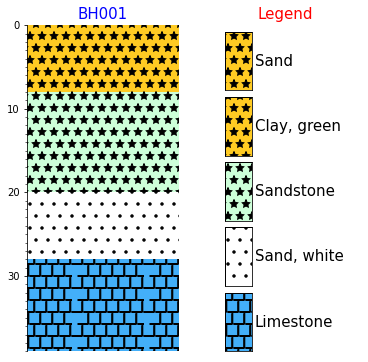

In [25]:
p.boreholes_3d[0].plot2d()

In [26]:
p.boreholes_3d[0].plot3d()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [27]:
p.boreholes_3d[0].plot3d(x3d=True)

### Display project boreholes

In [29]:
p.plot3d(labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

199


### Boreholes in 3D using X3D for interaction within the notebook